<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> Insurance Claim Prediction <br>  </b>
                    </b>
                </font>
            </div>
        </td>
        <td width="20%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

## Problem Statement
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs

## Data Definition

**age** : Age of the policyholder (Numeric)

**sex:** Gender of policyholder (Categoric)

**weight:** Weight of the policyholder (Numeric)

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

**no_of_dependents:** Number of dependent persons on the policyholder (Numeric)

**smoker:** Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

**claim:** The amount claimed by the policyholder (Numeric)

**bloodpressure:** Bloodpressure reading of policyholder (Numeric)

**diabetes:** Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)

**regular_ex:** A policyholder regularly excercises or not (no-excercise=0; excercise=1) (Categoric)

**job_title:** Job profile of the policyholder (Categoric)

**city:** The city in which the policyholder resides (Categoric)

**hereditary_diseases:**  A policyholder suffering from a hereditary diseases or not (Categoric)

## Icon Legends
<table>
  <tr>
    <th width="25%"> <img src="infer.png" style="width:25%;"></th>
    <th width="25%"> <img src="alsoreadicon.png" style="width:25%;"></th>
    <th width="25%"> <img src="todo.png" style="width:25%;"></th>
    <th width="25%"> <img src="quicktip.png" style="width:25%;"></th>
  </tr>
  <tr>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Inferences from Outcome</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Additional Reads</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Lets do it</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Quick Tips</b></font></div>
    </td>

</tr>

</table>


## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Data Analysis and Preparation](#data_preparation)**
    - 4.1 - [Understand the Data](#Data_Understanding)
        - 4.1.1 - [Data Dimension](#Data_Shape)
        - 4.1.2 - [Data Types](#Data_Types)
        - 4.1.3 - [Summary Statistics](#Summary_Statistics)
        - 4.1.4 - [Missing Values](#Missing_Values)
        - 4.1.5 - [Correlation](#correlation)
        - 4.1.6 - [Analyze Categorical Variables](#categorical)
        - 4.1.7 - [Analyze Relationships Between Target and Categorical Variables](#categorical_numerical)
        - 4.1.8 - [Feature Engineering](#Feature_Engineering)
        - 4.1.9 - [Discover Outliers](#outliers)
        - 4.1.10- [Recheck the Correlation](#Recheck_Correlation)
    - 4.2 - [Prepare the Data](#Data_Preparation)
        - 4.2.1 - [Check for Normality](#Normality)
        - 4.2.2 - [One-Way Anova](#one_way_anova)
        - 4.2.3 - [Dummy Encoding of Categorical Variables](#dummy)
5. **[Linear Regression (OLS)](#LinearRegression)**
    - 5.1 - [Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)](#withLog)
    - 5.2 - [Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)](#withoutLog)
    - 5.3 - [Fine Tune Linear Regression Model (OLS)](#Finetuning)
      - 5.3.1 - [Linear Regression after Removing Insignificant Variable (OLS)](#RemovingInsignificantVariable)
      - 5.3.2 - [Check the Assumptions of Linear Regression](#Assumptions)
          - 5.3.2.1 - [Detecting Autocorrelation](#Autocorrelation)
          - 5.3.2.2 - [Detecting Heteroskedasticity](#Heteroskedasticity)
          - 5.3.2.3 - [Linearity of Residuals](#Linearity_of_Residuals)
          - 5.3.2.4 - [Normality of Residuals](#Normality_of_Residuals)
      - 5.3.3 - [Linear Regression after Removing Insignificant Variable (OLS) - Scaled Data](#RemovingInsignificantVariable_scaleddata)
      - 5.3.4 - [Linear Regression with Interaction (OLS)](#Interaction)
6. **[Regularization (OLS)](#regularization)**
    - 6.1 - [Ridge Regression Model (OLS)](#Ridge_Regression)
    - 6.2 - [Lasso Regression Model (OLS)](#Lasso_Regression)
    - 6.3 - [Elastic Net Regression Model (OLS)](#Elastic_Net)
7. **[Stochastic Gradient Descent - SGD (sklearn)](#StochasticGradientDescent)**
    - 7.1 - [Linear Regression with SGD (sklearn)](#LinearRegressionwithStochasticGradientDescent)
    - 7.2 - [Linear Regression with SGD using GridSearchCV (sklearn)](#StochasticGradientDescentwithGridSearchCV)
8. **[Conclusion and Interpretation](#rmse_and_r-squared)**    

<a id='import_lib'></a>
## 1. Import Libraries

**Let us import the required libraries and functions**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tools.eval_measures import rmse
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy.stats import shapiro
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score, confusion_matrix,classification_report
import statsmodels.api as sm
print("Libraries Imported")


Libraries Imported


<a id='set_options'></a>
## 2. Set Options

In [2]:
# the path for reading the data file
# Note: Set your path accordingly
#os.chdir('/Users/Dippies/GL DSE Deliveries/Regression/Nov 22')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

<a id='Read_Data'></a>
## 3. Read Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data to get insights from the data<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
df=pd.read_csv('healthinsurance.csv')
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.000000,male,64,24.300000,NoDisease,1,0,NewYork,72,0,0,Actor,13112.600000
1,49.000000,female,75,22.600000,NoDisease,1,0,Boston,78,1,1,Engineer,9567.000000
2,32.000000,female,64,17.800000,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.200000
3,61.000000,female,53,36.400000,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.600000
4,19.000000,female,50,20.600000,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.700000


<a id='data_preparation'></a>
## 4. Data Analysis and Preparation


<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data prior to building predictive models. <br><br>
                        Here we will analyze and prepare data to perform regression analysis:<br>
                        1. Check dimensions of the dataframe in terms of rows and columns <Br>
                        2. Check the data types. Refer data definition to ensure your data types are correct  <br>
                        3. If data types are not as per business context, change the data types as per requirement <br>
                        4. Study summary statistics<br>
                        5. Check for missing values<br>
                        6. Study correlation<br>
                        7. Analyze categorical variables<br>
                        8. Analyze relationship between target variable and categorical variables<br>
                        9. Perform feature engineering<br>
                       10. Detect outliers<br>
                       11. Recheck the correlation<br><br>
                        Note: It is an art to explore data and one will need more and more practice to gain expertise in this area.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
### 4.1 Understand the Dataset

<a id='Data_Shape'></a>
### 4.1.1 Data Dimension

To know the dimensions of the data:

In [4]:
df.shape

(15000, 13)

We see the dataframe has 13 columns and 15000 observations.

<a id='Data_Types'></a>
### 4.1.2 Data Types
Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In this section we will: <br>  
                        1. Check data types<br>
                        2. Change the incorrect data types<br>
                        3. Recheck the data types after the conversion
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check data types**

In [5]:
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='infer.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                <font color='#21618C'>
                    <b>From the above output, we see that the data type of 'smoker', 'diabetes' and 'regular_ex' is 'int64'.<br><br>
                        But according to data definition, 'smoker', 'diabetes' and 'regular_ex' are categorical variables, which are wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>




**2. Change the incorrect data types**

In [6]:
df[['smoker', 'diabetes',  'regular_ex']]=\
               df[['smoker', 'diabetes' , 'regular_ex']].astype('object')

**3. Recheck the data types after the conversion**

In [7]:
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                  object
city                    object
bloodpressure            int64
diabetes                object
regular_ex              object
job_title               object
claim                  float64
dtype: object

Note the data types are now as per the data definition. Now we can proceed with the analysis.

<a id='Summary_Statistics'></a>
### 4.1.3 Summary Statistics

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In our dataset we have numerical and categorical variables. Now we check for summary statistics of all the variables<br>
                        1. For numerical variables, we use .describe()<br>
                        2. For categorical features, we use .describe(include=object) <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. For numerical variables, we use .describe()**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,14604.000000,39.547521,14.015966,18.000000,27.000000,40.000000,52.000000,64.000000
weight,15000.000000,64.909600,13.701935,34.000000,54.000000,63.000000,76.000000,95.000000
bmi,14044.000000,30.266413,6.122950,16.000000,25.700000,29.400000,34.400000,53.100000
no_of_dependents,15000.000000,1.129733,1.228469,0.000000,0.000000,1.000000,2.000000,5.000000
bloodpressure,15000.000000,68.650133,19.418515,0.000000,64.000000,71.000000,80.000000,122.000000
claim,15000.000000,13401.437620,12148.239619,1121.900000,4846.900000,9545.650000,16519.125000,63770.400000


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.<br>
    Note, the average age of a policyholder claiming the insurance is 39 years. The claim amount is between 1121 to 63770. Here the mean bmi of a policyholder is 30 (the healthy bmi range is between 18.5 to 24.9) and average weight is 64.<br><br>
    If we observe the count of all the variables, there is less count for variable age and bmi than other variables. So we can say that there are missing values in these variables. Also, the minimum bloodpressure is zero, which is invalid. We need to treat them appropriately.</b>     </font>
            </div>
        </td>
    </tr>
</table>

**2. For categorical features, we use .describe(include=object)**

In [9]:
df.describe(include='O').T

,count,unique,top,freq
sex,15000,2,female,7652
hereditary_diseases,15000,10,NoDisease,13998
smoker,15000,2,0,12028
city,15000,91,NewOrleans,302
diabetes,15000,2,1,11655
regular_ex,15000,2,0,11638
job_title,15000,35,Student,1320


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The summary statistics for categorical variables can be interpreted as:<br><br>
       count - Total number of observations<br>
       unique - Number of unique classes in a variable<br>
       top - The most repeated class<br>
       freq - Frequency of most repeated class<br><br>
       For variable city, it is apparent that data has been taken from 91 different cities. Also, most of the policyholder are from NewOrleans. <br><br> In addition, there are more number of non smokers in the dataset and most of the policyholder are diabetic</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Missing_Values'></a>
### 4.1.4 Missing Values

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to get the count of missing values in each column, we use the in-built function .isnull().sum()
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
miss=df.isnull().sum()
pct=miss/len(df)*100
missed=pd.DataFrame({'Count':miss, 'Percent':pct})
missed[missed['Count']>0]

,Count,Percent
age,396,2.640000
bmi,956,6.373333


The missing values are present in the data for the `age` and `bmi` variables. There are 396 (2.6%) missing values for the variable `age` and 956 (6.4%) missing values for the variable `bmi`

### Visualize Missing Values using Heatmap

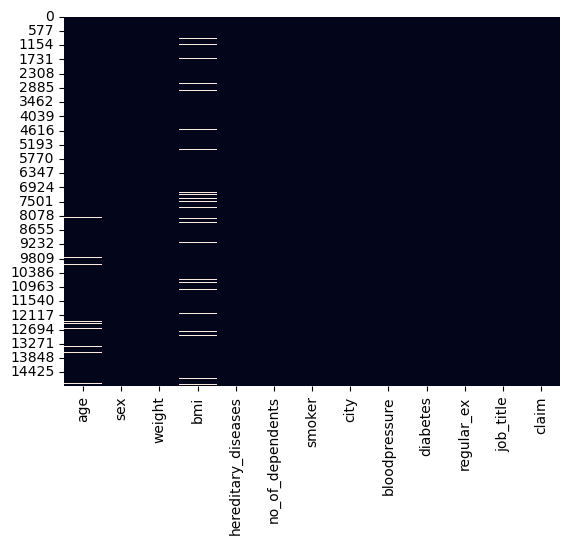

In [11]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### Deal with Missing Values

How to deal with missing data?<br>

Depending on scenarios, you may:<br>
a. Drop the whole row<br>
b. Drop the whole column<br>

OR replace:<br>
a. The missing values with mean<br>
b. The missing values with median<br>
c. Replace it based on other functions<br><br>

The entire column is dropped only if most entries (80%-90%) in the column are missing. We have the option to either drop the rows containing the missing values or replace them. In our dataset, there are not many values that are missing. So, we opt to replace these values. For the variable 'age', we will replace missing values by the mean of age across the gender.

In [12]:
# check the ditribution of age and bmi for the gender 
print(df.groupby('sex')['age'].mean())

sex
female   39.361040
male     39.738395
Name: age, dtype: float64


The average age for the male and female is nearly the same. We will fill in missing values with the mean age of the policyholder.

In [13]:
print(df.groupby('sex')['bmi'].mean())

sex
female   29.808176
male     30.757501
Name: bmi, dtype: float64


Replace missing values by mean for the BMI.

In [14]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

We have seen that the the minimum bloodpressure is 0, which is absurd. It implies that these are missing values. 
Let us replace these missing values with the median value.

In [15]:
df['bloodpressure']=df['bloodpressure'].replace(0, df['bloodpressure'].mean())

Recheck the summary statistics to confirm the missing value treatment for the variable 'bloodpressure'.

In [16]:
df.isnull().sum().any()

False

To confirm the data is valid, observe the minimum and maximum value of the variable `bloodpressure` is 40, which can be possible with patients suffering from low bloodpressure.

Let's view the missing value plot once again to see if the missing values have been imputed.

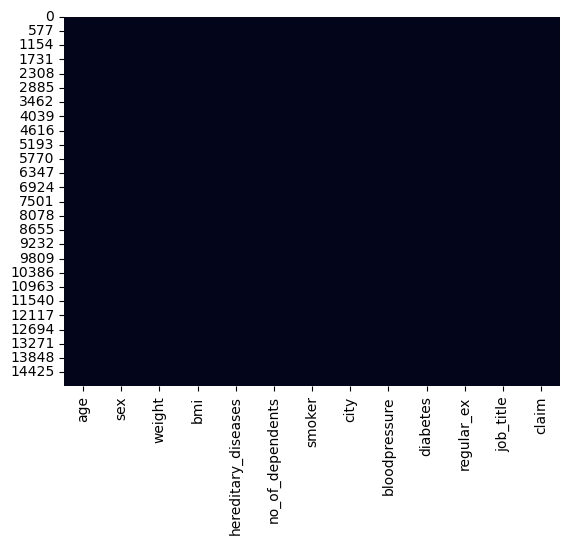

In [17]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Now, we obtain the dataset with no missing values.

<a id='correlation'></a>
### 4.1.5 Correlation

<ul>
    <li>Correlation is the extent of linear relationship among numeric variables</li>
    <li>It indicates the extent to which two variables increase or decrease in parallel</li>
    <li>The value of a correlation coefficient ranges between -1 and 1</li>
    <li> Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which pairs are correlated</li>
    </ul>
    

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to compute the correlation matrix, we perform the following:<br>
                    1. Filter out only the numeric variables from the dataframe using select_dtypes() function<br>
                    2. Call the corr() function which will return the correlation matrix of numeric variables <br>
                    3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Filter out only the numeric variables from the dataframe using select_dtypes() function**

In [18]:
df_numerics=df.select_dtypes(exclude='O')
df_numerics.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

The dataframe df_numeric_features has 6 numeric variables.

**2.  Call the corr() function which will return the correlation matrix of numeric variables**

In [19]:
df_numerics.corr()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
age,1.000000,0.281228,0.180123,0.058926,0.018078,0.298359
weight,0.281228,1.000000,0.243269,0.135687,0.016271,0.077716
bmi,0.180123,0.243269,1.000000,0.049704,-0.048570,0.197939
no_of_dependents,0.058926,0.135687,0.049704,1.000000,0.037088,0.067614
bloodpressure,0.018078,0.016271,-0.048570,0.037088,1.000000,0.037132
claim,0.298359,0.077716,0.197939,0.067614,0.037132,1.000000


**3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix**

In [20]:
!pip install seaborn --upgrade

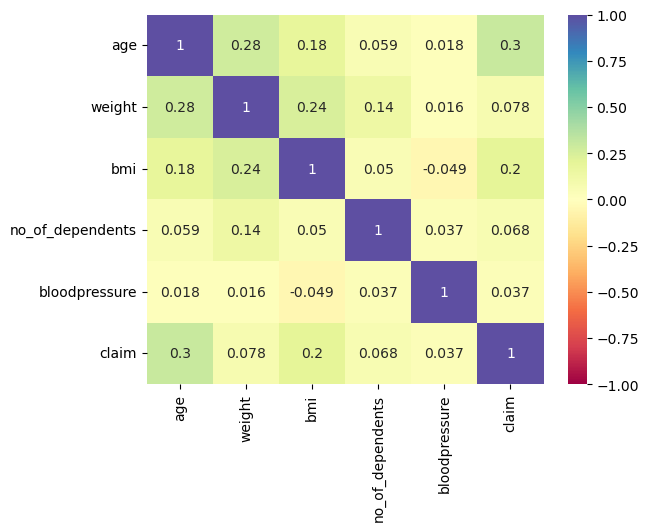

In [21]:
sns.heatmap(df_numerics.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=+1)
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be observe that the numeric variables are not correlated with each other since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data. <br><br>
                        Recollect that one of the assumptions of linear regression is that, there should be NO Multicollinearity present in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Correlation does not imply causation. In other words, if two variables are correlated it does not mean that one variable caused the other</b> <br><br>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='categorical'></a>
### 4.1.6 Analyze Categorical Variables

Categorical variables are those in which the values are labeled categories. The values, distribution, and dispersion of categorical variables are best understood with bar plots.

First let us print the summary statistics of the categorical features.

In [22]:
df_categorics=df.select_dtypes(include='O')
df_categorics.columns

Index(['sex', 'hereditary_diseases', 'smoker', 'city', 'diabetes',
       'regular_ex', 'job_title'],
      dtype='object')

In [23]:
for col in df_categorics.columns:
    print(col,':', df_categorics[col].unique())

sex : ['male' 'female']
hereditary_diseases : ['NoDisease' 'Epilepsy' 'EyeDisease' 'Alzheimer' 'Arthritis'
 'HeartDisease' 'Diabetes' 'Cancer' 'High BP' 'Obesity']
smoker : [0 1]
city : ['NewYork' 'Boston' 'Phildelphia' 'Pittsburg' 'Buffalo' 'AtlanticCity'
 'Portland' 'Cambridge' 'Hartford' 'Springfield' 'Syracuse' 'Baltimore'
 'York' 'Trenton' 'Warwick' 'WashingtonDC' 'Providence' 'Harrisburg'
 'Newport' 'Stamford' 'Worcester' 'Atlanta' 'Brimingham' 'Charleston'
 'Charlotte' 'Louisville' 'Memphis' 'Nashville' 'NewOrleans' 'Raleigh'
 'Houston' 'Georgia' 'Oklahoma' 'Orlando' 'Macon' 'Huntsville' 'Knoxville'
 'Florence' 'Miami' 'Tampa' 'PanamaCity' 'Kingsport' 'Marshall' 'Mandan'
 'Waterloo' 'IowaCity' 'Columbia' 'Indianapolis' 'Cincinnati'
 'Bloomington' 'Salina' 'KanasCity' 'Brookings' 'Minot' 'Chicago'
 'Lincoln' 'FallsCity' 'GrandForks' 'Fargo' 'Cleveland' 'Canton'
 'Columbus' 'Rochester' 'Minneapolis' 'JeffersonCity' 'Escabana'
 'Youngstown' 'SantaRosa' 'Eureka' 'SanFrancisco' 'SanJ

There are 7 categorical variables. From the output we see that the variable cities has most number of categories. There are 91 cities in the data, of which NewOrleans occurs highes number of times.

Let us visualize the variables. However, we shall exculde the variable `city` from it.

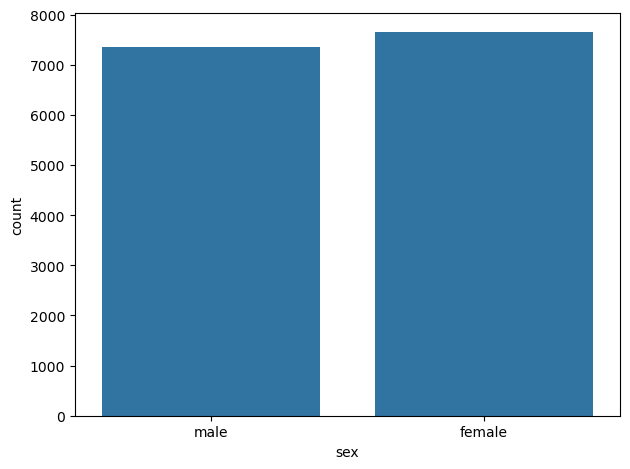

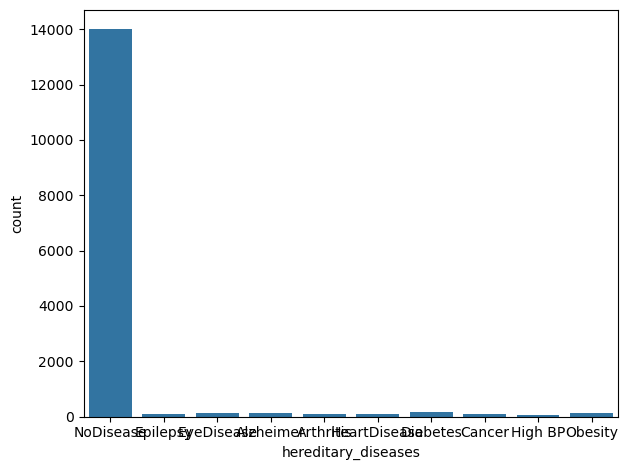

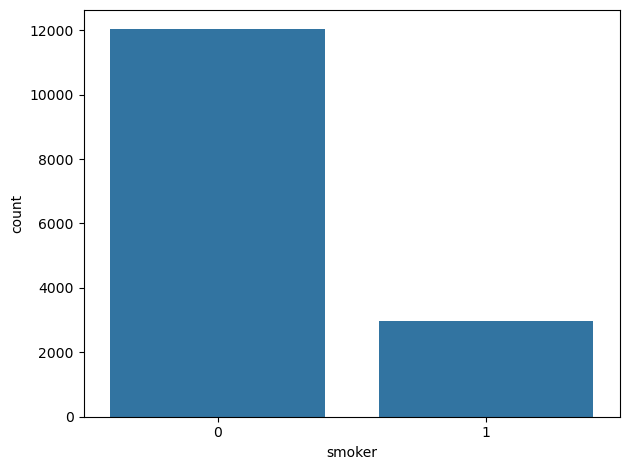

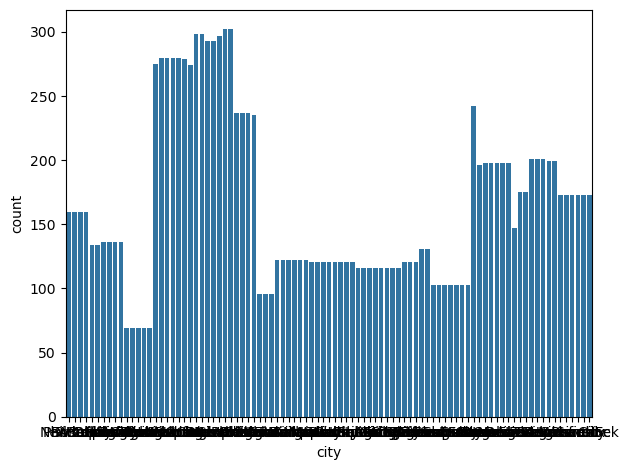

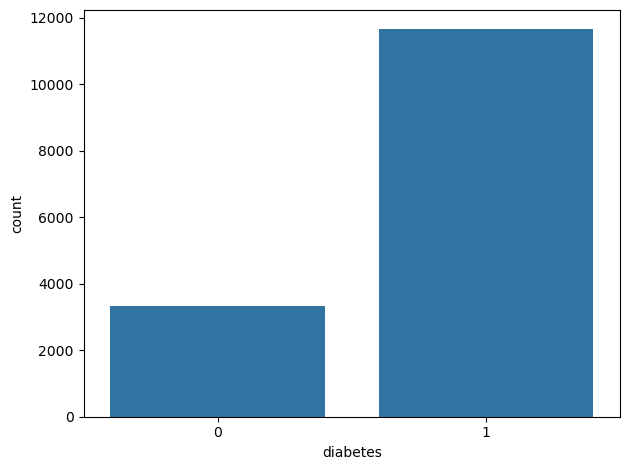

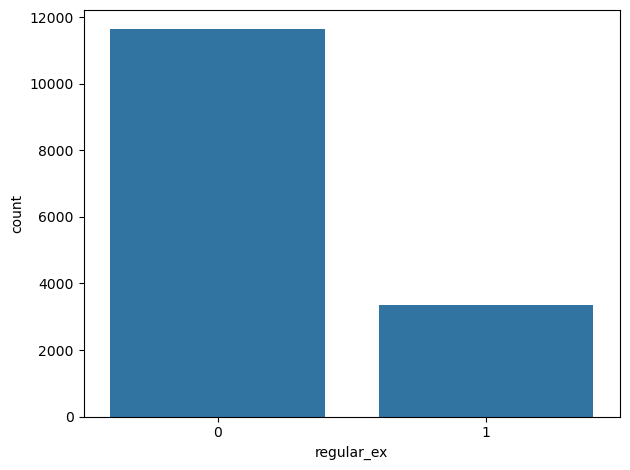

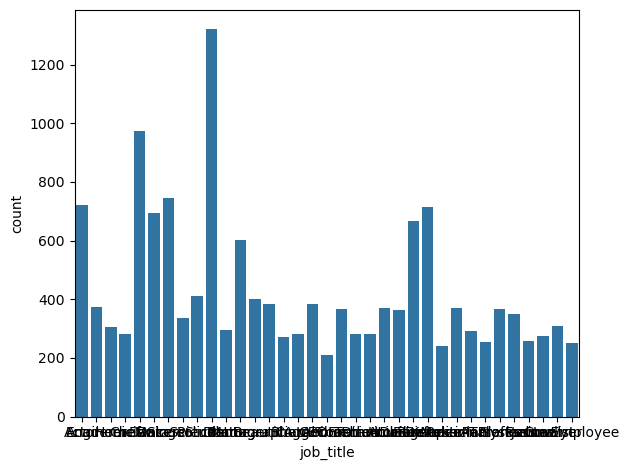

In [24]:
for col in df_categorics.columns:
    sns.countplot(x=df[col])
    plt.tight_layout()
    plt.show()

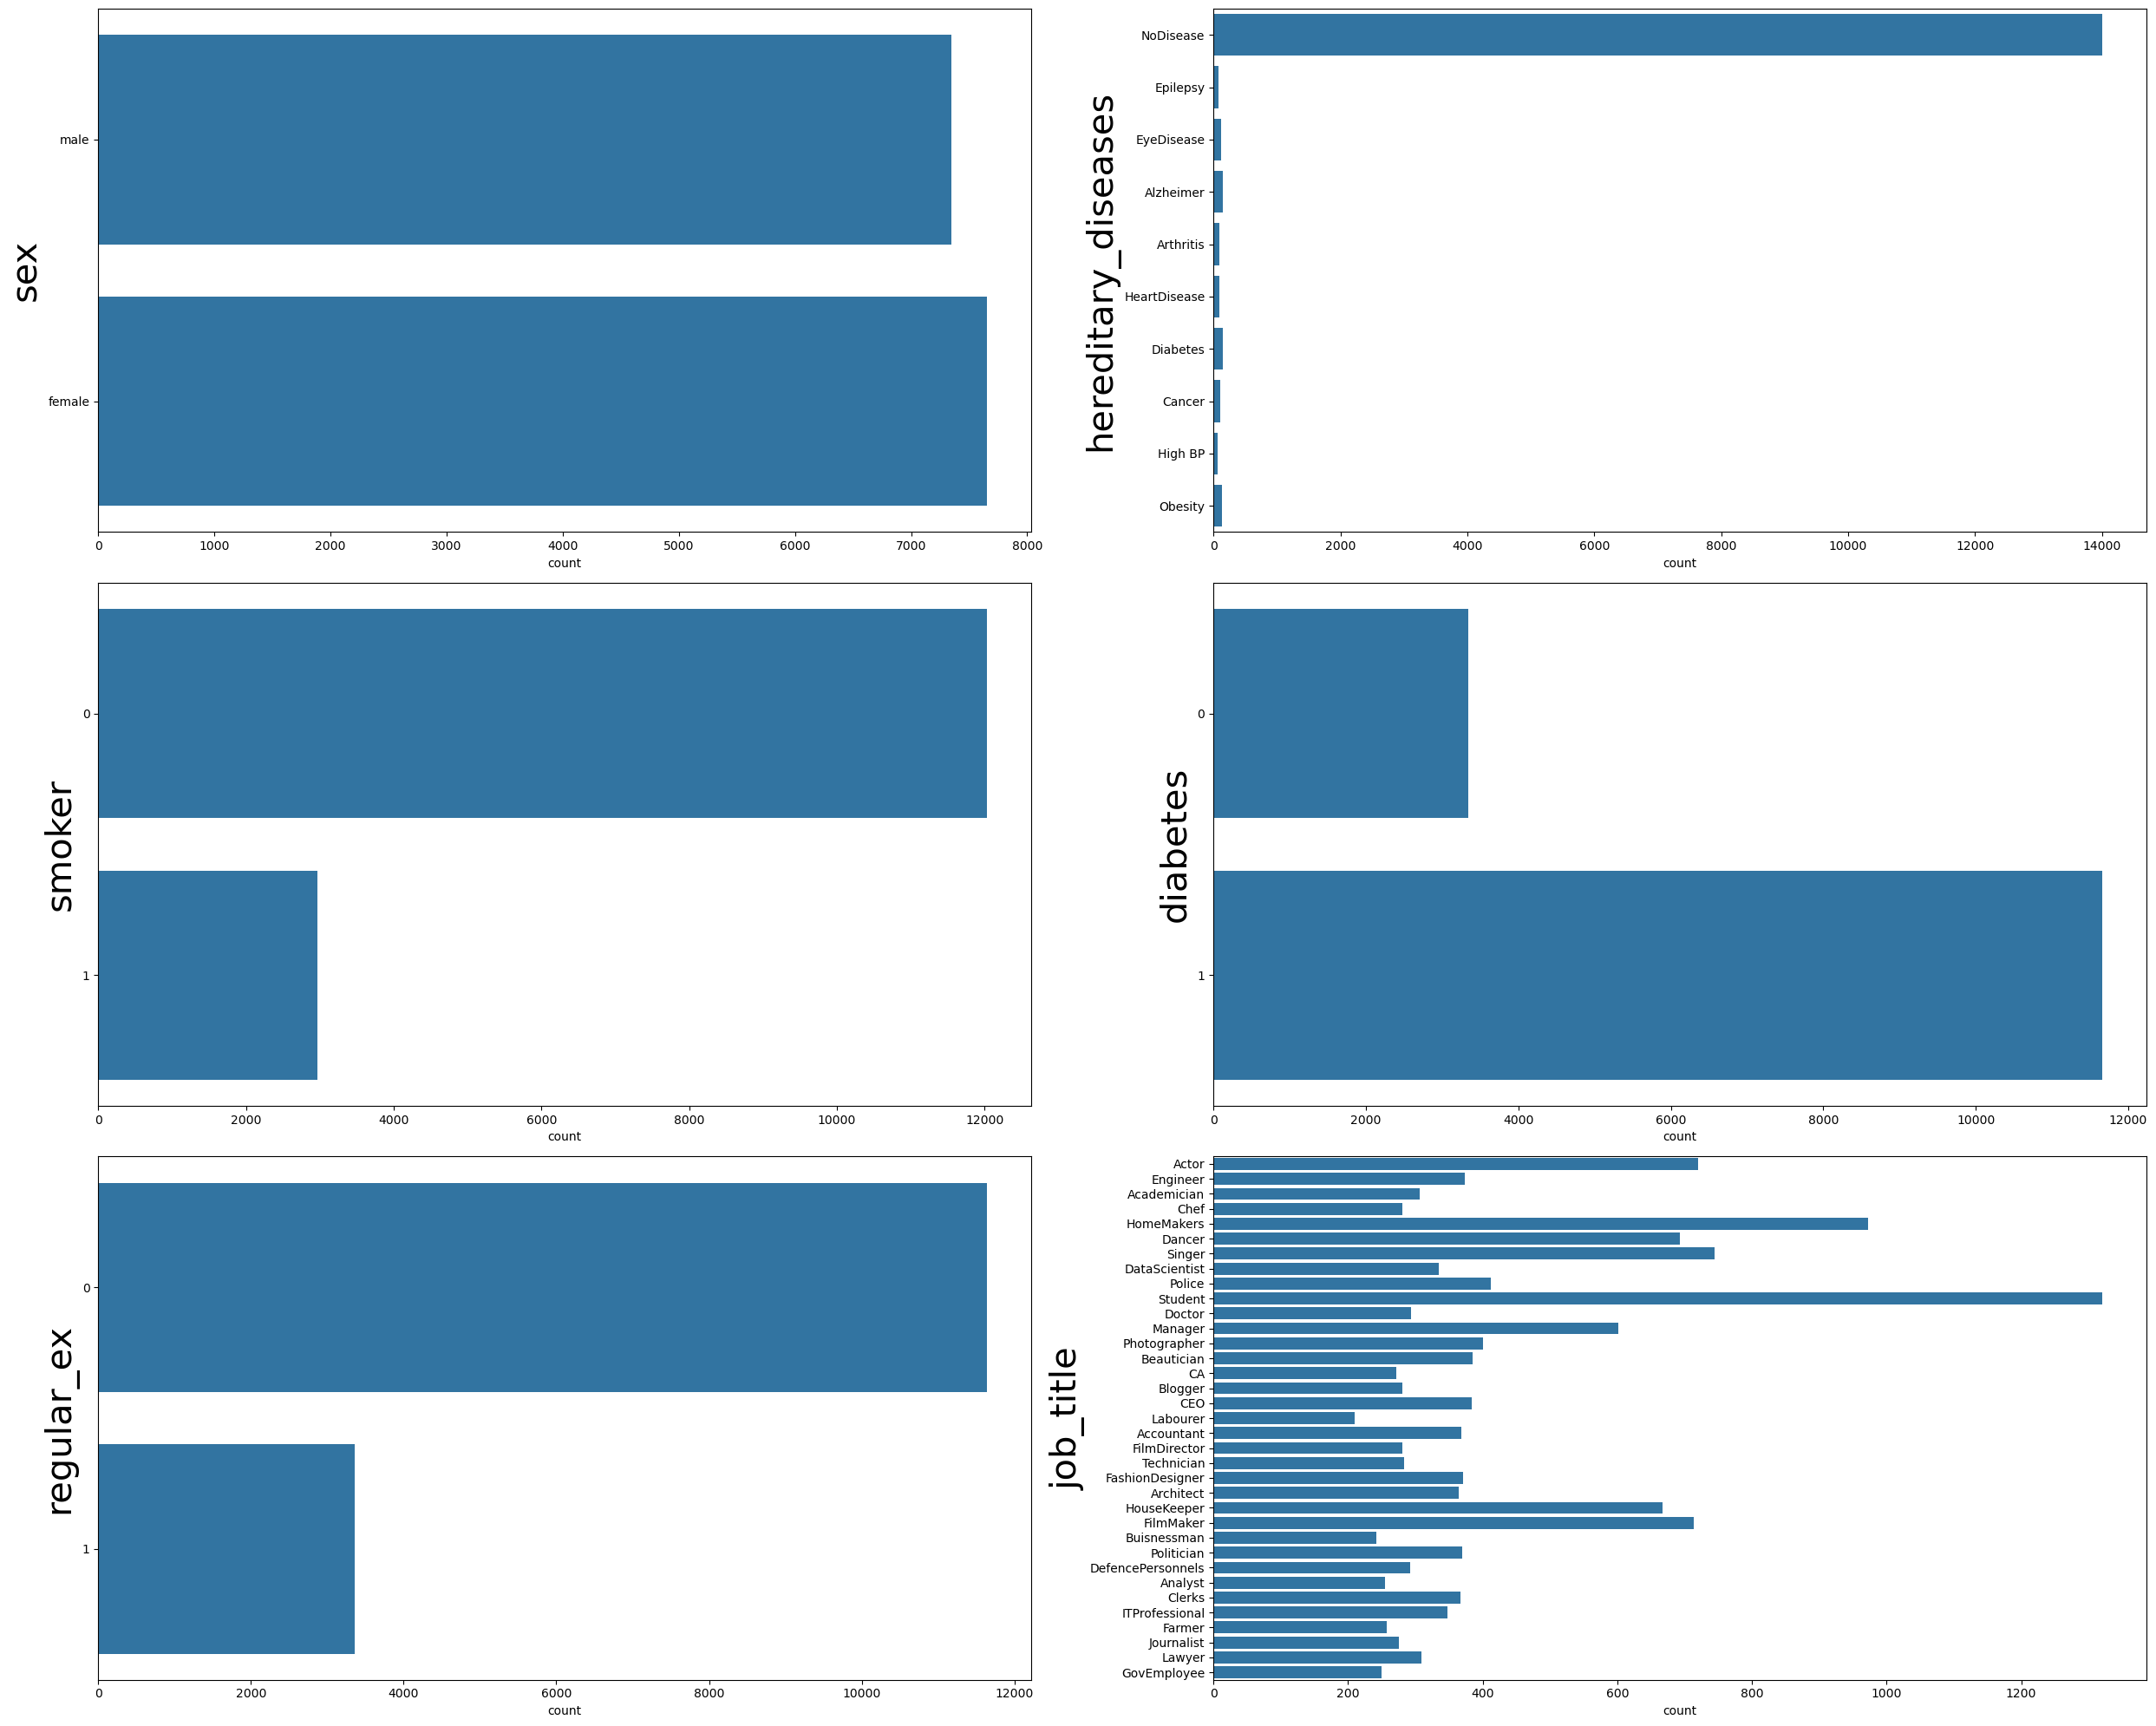

In [25]:
df_categorics=df.select_dtypes(include='O').drop('city', axis=1)
fig, ax= plt.subplots(3, 2, figsize=(25, 20))
for col , subplot in zip(df_categorics, ax.flatten()):
    cp=sns.countplot(y=df[col], ax=subplot)
    cp.set_ylabel(col, fontsize=30)
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot we see that:<ul>
                        <li> The number of males are femals are nearly equal</li>
                        <li> Most of the people in the data have no underlined disease </li>
                        <li> Also the number of non smokers is significantly large </li>
                        <li> Most of the policyholder do not excercise regularly</li>
                        <li> Many of the policyholders have diabetes</li>
                        <li> The had has large number of students</li>
                        </ul></b>
                </font>
            </div>
        </td>
    </tr>
</table>

Now consider the variable `city`.

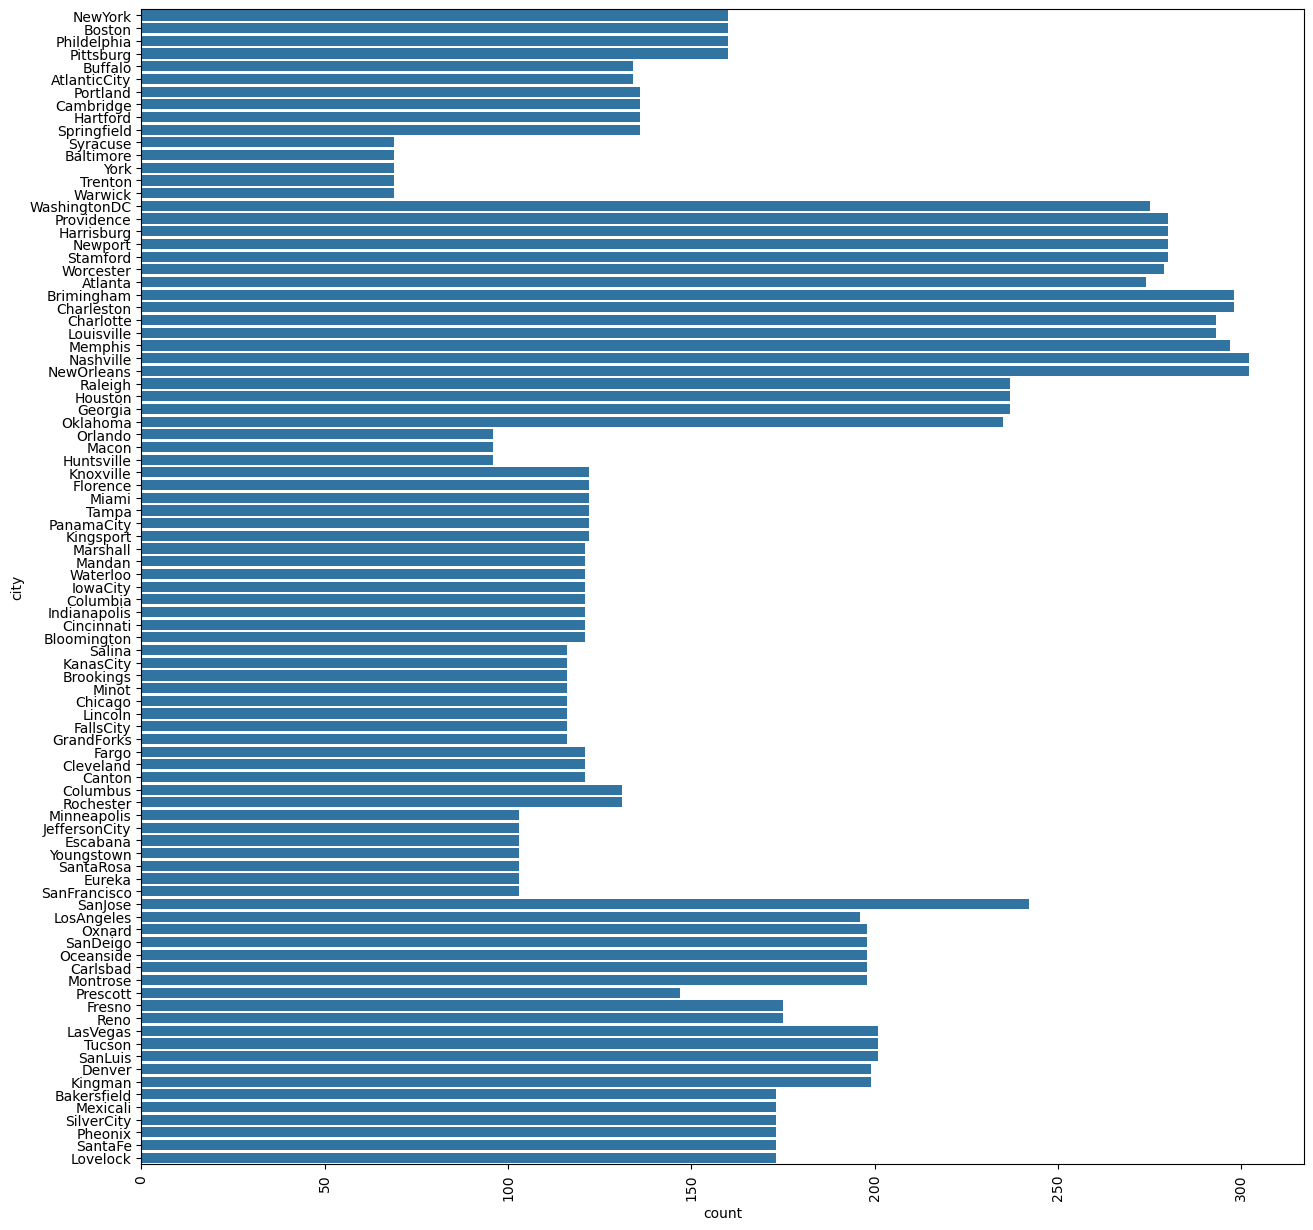

In [26]:
plt.figure(figsize=(15, 15))
ax=sns.countplot(y=df['city'], orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                       We see that there are many cities considered in the data. It is quite difficult to perform meaningful analysis on this variable.
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='categorical_numerical'></a>
### 4.1.7 Analyze Relationship Between Target and Categorical Variables
The box-and-whisker plot is commonly used for visualizing relationships between numerical variables and categorical variables.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let’s start by creating box-and-whisker plots with seaborn’s boxplot method:
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

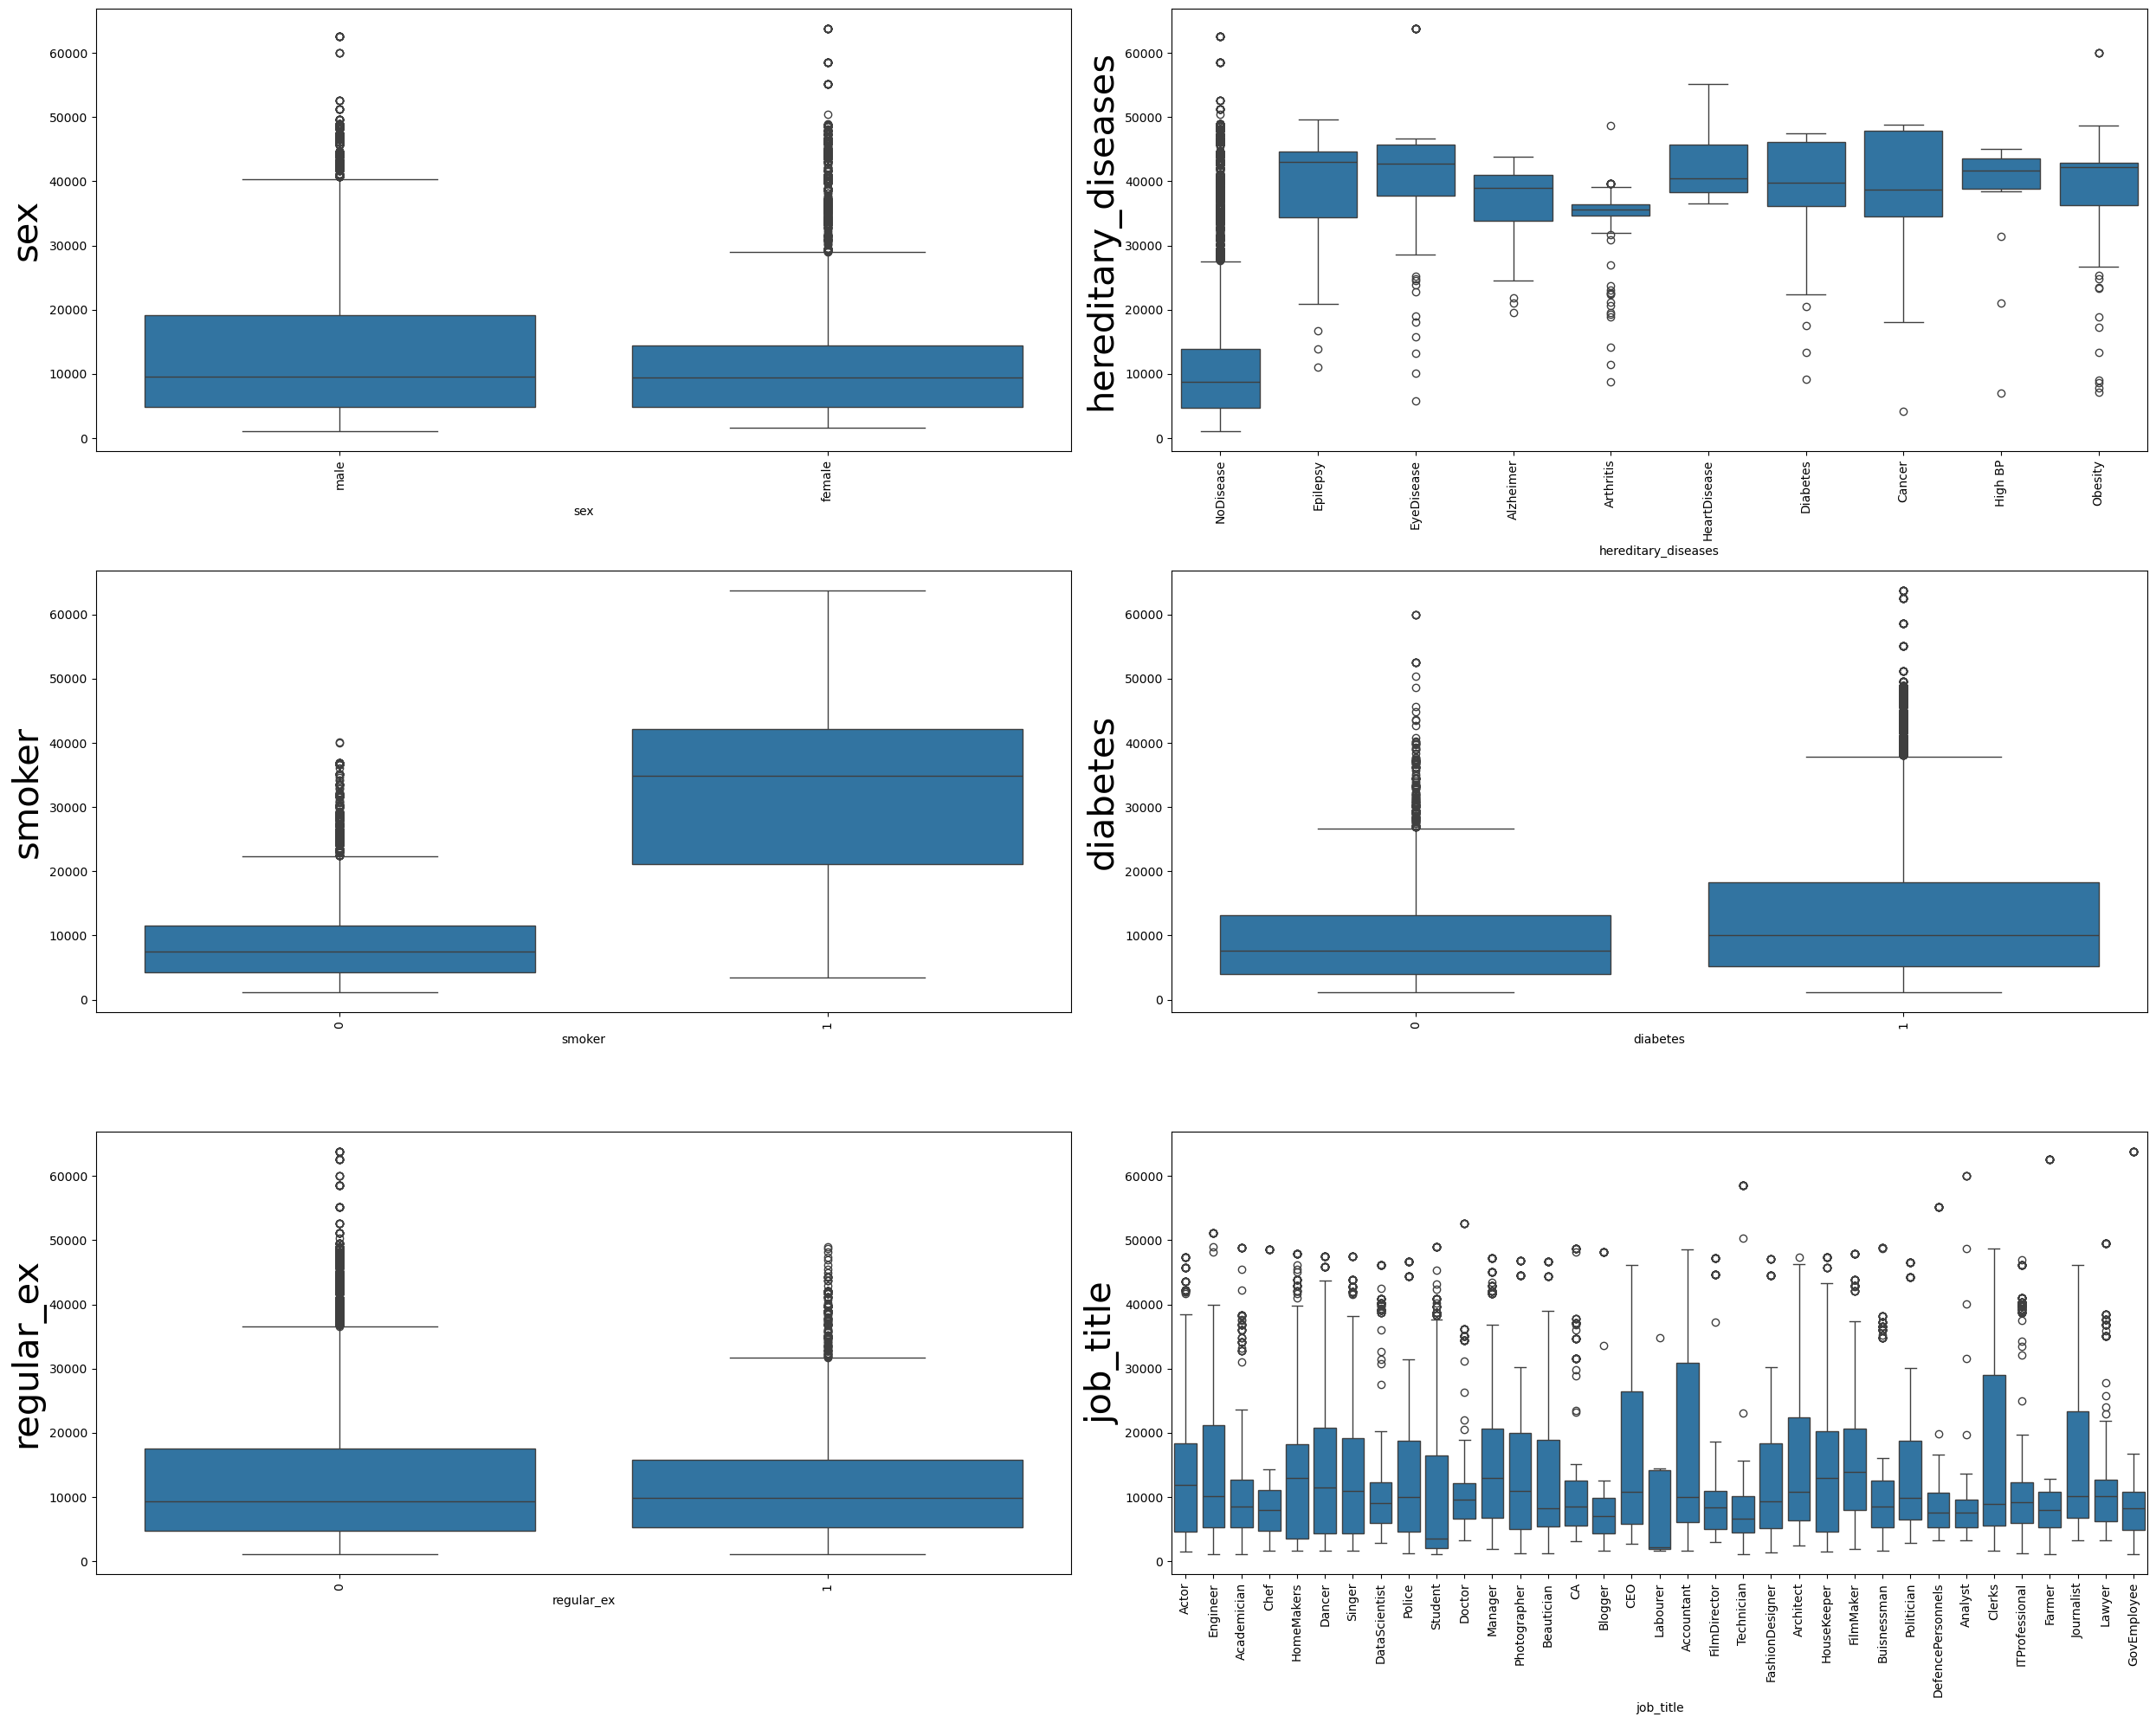

In [27]:
fig, ax= plt.subplots(3, 2, figsize=(25, 20))
for col , subplot in zip(df_categorics, ax.flatten()):
    box=sns.boxplot(x=df[col], y=df['claim'], ax=subplot)
    box.set_ylabel(col, fontsize=30)
    box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

Since the variable `city` has 91 categories, we shall plot it separately.

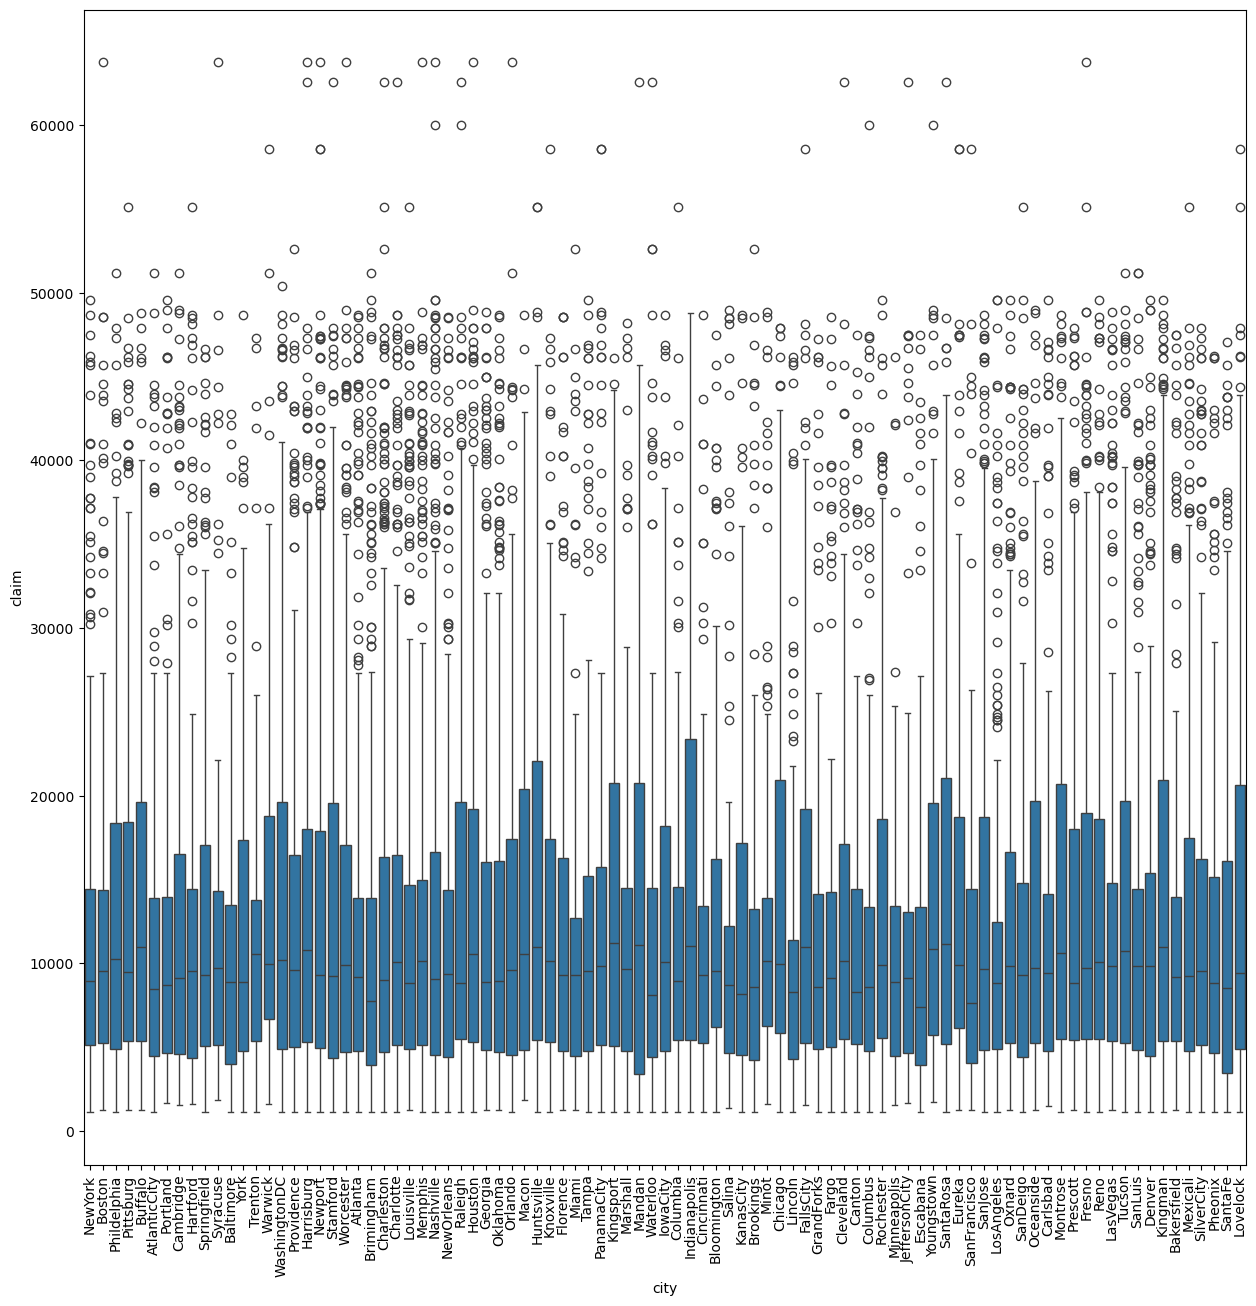

In [28]:
plt.figure(figsize=(15, 15))
ax=sns.boxplot(x=df['city'],y=df['claim'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b><ul>
                        <li>We can see that 'hereditary_diseases' variable with 'NoDisease' class have very low average claim amount than other diseases. We can also see that there is a little variance in average claim cost between 'hereditary_diseases'</li>
<br>                       <li>The distribution of claim between the two categories, 'smoker'(1) and 'non-smoker'(0), are distinct enough to take smokers as a potentially good predictor of the claim amount. We can see that a 'non-smoker' has a median claim amount of around 10000 while a 'smoker' has a median claim of 40000.</li> <br>
                        <li> Also diabetic people have slightly higher average claim amount than non-diabetic people </li><br>
                        <li>This visualization helps us understand that there is a variance in average claim cost between different cities. However, the median claim cost is about 10000. As we can see, there are large number of cities and its not easy to interpret. Therefore we’ll combine all the cities into the region</li>
                        </ul></b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='Feature_Engineering'></a>
### 4.1.8 Feature Engineering

Create a new feature 'region' by combining the cities.

**There are 91 unique cities. We will divide these cities into North-East, West, Mid-West, and South regions.**

Let's create a new variable region. We will replace the original variable `city` with it.

In [29]:
north_east=['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
                                                       'AtlanticCity','Portland', 'Cambridge', 'Hartford', 
                                                       'Springfield', 'Syracuse', 'Baltimore', 'York', 'Trenton',
                                                       'Warwick', 'WashingtonDC', 'Providence', 'Harrisburg',
                                                       'Newport', 'Stamford', 'Worcester']

south=['Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
                                                         'Louisville', 'Memphis', 'Nashville', 'NewOrleans',
                                                         'Raleigh', 'Houston', 'Georgia', 'Oklahoma', 'Orlando',
                                                         'Macon', 'Huntsville', 'Knoxville', 'Florence', 'Miami',
                                                         'Tampa', 'PanamaCity', 'Kingsport', 'Marshall']
mid_west=['Mandan', 'Waterloo', 'IowaCity', 'Columbia',
                                                         'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
                                                         'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
                                                         'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 
                                                         'Canton', 'Columbus', 'Rochester', 'Minneapolis', 
                                                         'JeffersonCity', 'Escabana','Youngstown']
west=['SantaRosa', 'Eureka', 'SanFrancisco', 'SanJose',
                                                         'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside', 
                                                         'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno',
                                                         'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman',
                                                         'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix',
                                                         'SantaFe', 'Lovelock']

In [30]:
df['region']=df['city'].replace(north_east, 'North East')
df['region']=df['region'].replace(south, 'South')
df['region']=df['region'].replace(mid_west, 'Mid West')
df['region']=df['region'].replace(west, 'West')

In [31]:
df['region'].value_counts()

region
South         4444
West          4273
North East    3471
Mid West      2812
Name: count, dtype: int64

In [32]:
df.head(2)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,region
0,60.000000,male,64,24.300000,NoDisease,1,0,NewYork,72.000000,0,0,Actor,13112.600000,North East
1,49.000000,female,75,22.600000,NoDisease,1,0,Boston,78.000000,1,1,Engineer,9567.000000,North East


In [33]:
df.drop('city', inplace=True, axis=1)

In [34]:
df.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'bloodpressure', 'diabetes', 'regular_ex',
       'job_title', 'claim', 'region'],
      dtype='object')

#### Analyze relationship between region and claim variable

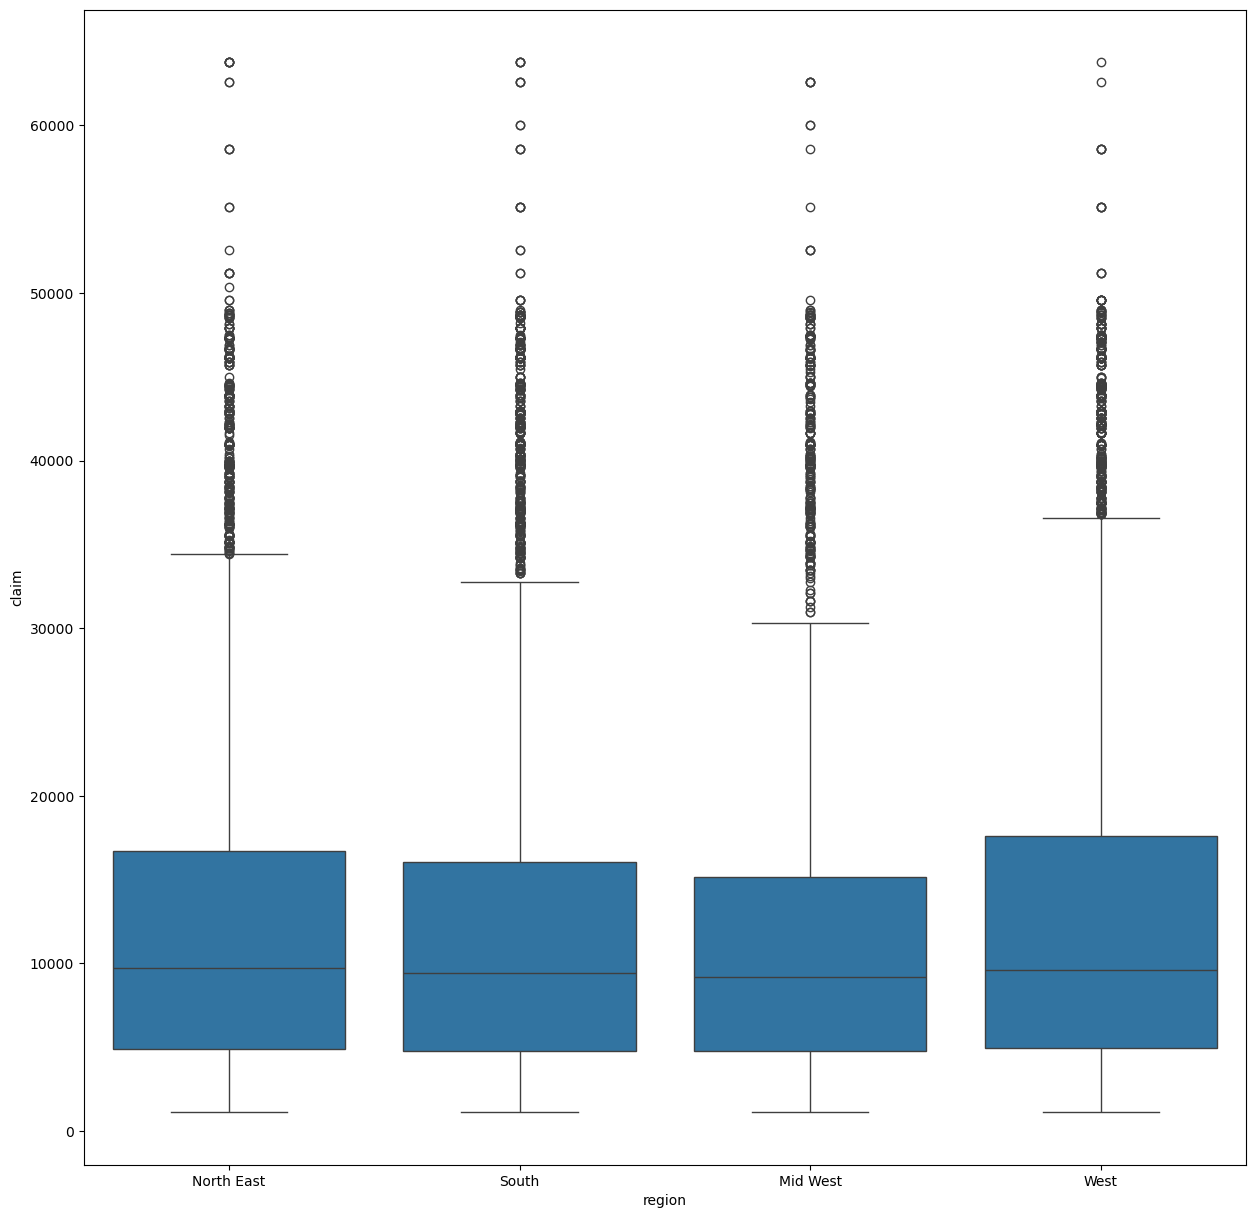

In [35]:
plt.figure(figsize=(15, 15))
sns.boxplot(x=df['region'], y=df['claim'])
plt.show()

The plot shows that there is not much significant difference in the variance of the insurance claim across the regions.

<a id='outliers'></a>
### 4.1.9 Discover Outliers

<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>I love to know more:</b> <br><br>
                    <a href="https://bit.ly/325NEKS">1. Assumptions of Linear Regression <br>
                    <a href="https://bit.ly/2PBvA8T">2. Why Correlation does not Imply Causation <br>
                </font>
            </div>
        </td>
    </tr>
</table>



#### Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

**Recollect that one of the assumptions of Linear Regression is there should be no outliers present in the data**

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to detect outliers in numerical data, we perform the following:<br>
                    1. Plot boxplot for numerical data<br>
                    2. Note the variables for which outliers are present<br>
                    3. Remove outliers by IQR method<br> 
                    4. Plot boxplot to recheck for outliers</b> <br><br>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Plot boxplot for numerical data**

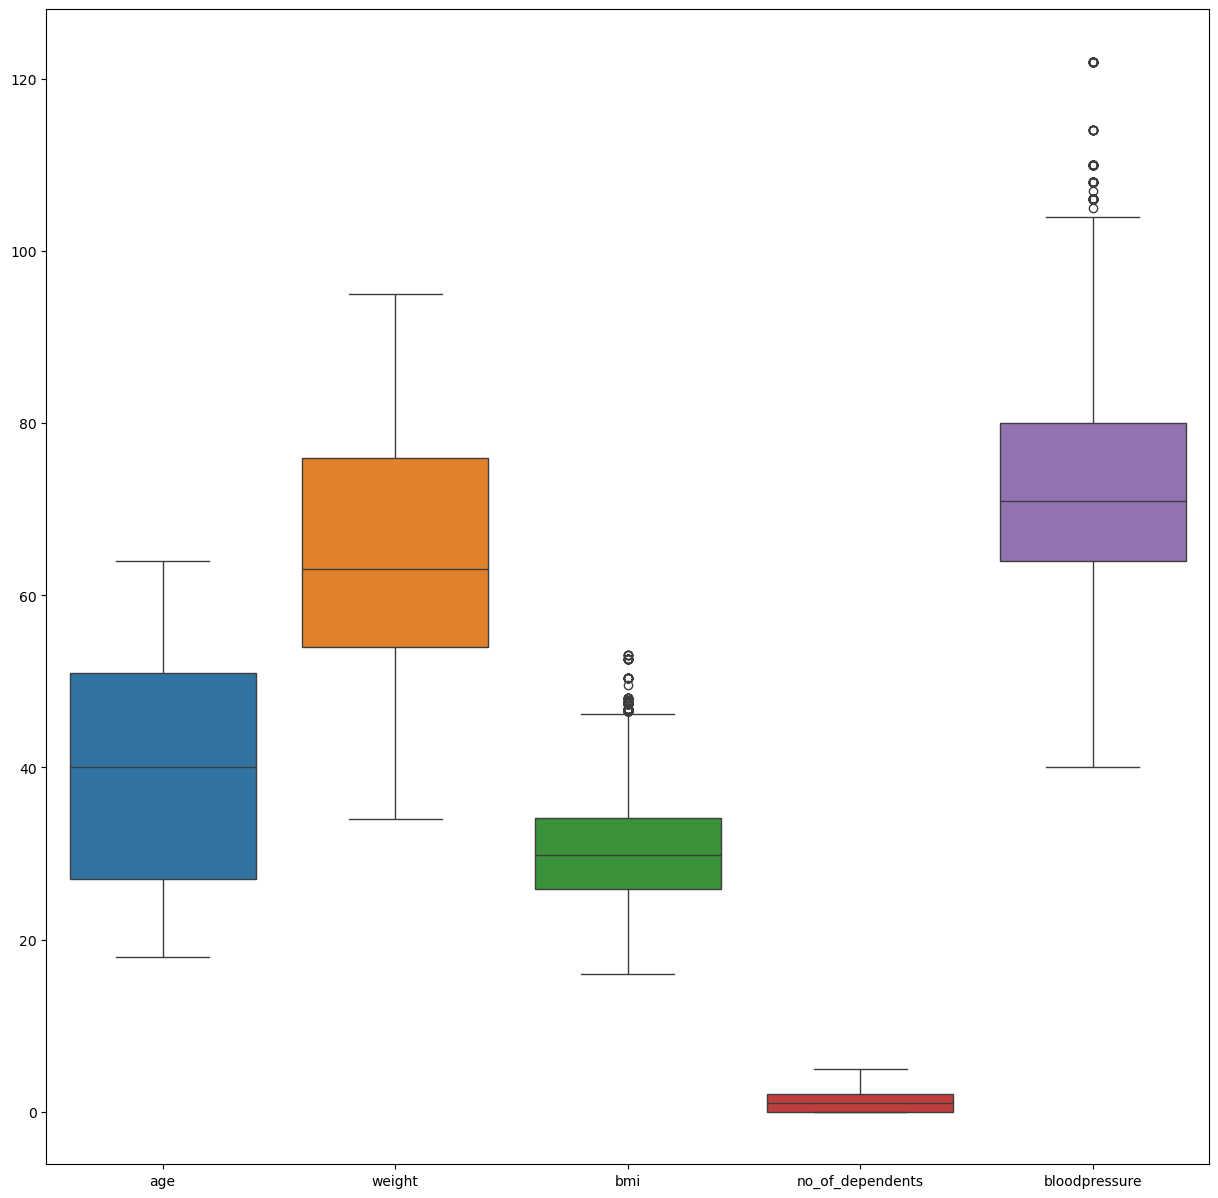

In [36]:
df_numerics.drop('claim', axis=1, inplace=True)
plt.figure(figsize=(15, 15))
sns.boxplot(df_numerics)
plt.show()

**2. Note the variables for which outliers are present**

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we notice that for the variable 'bmi' and 'bloodpressure' there are points above the upper extreme - these points are outliers<br>

Let us use the IQR method to remove the outliers</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>



<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Outliers can also be detected using standard deviation method if we know that the distribution of values in the sample is Gaussian or Gaussian-like</b> <br><br>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>I love to know more:  </b><a href="https://bit.ly/33bgNpq">How to use Statistics to Identify Outliers in Data

</font>
            </div>
        </td>
    </tr>
</table>



**3. Remove outliers by IQR method**

In [37]:
q1=df_numerics.quantile(0.25)
q3=df_numerics.quantile(0.75)
iqr=q3-q1
iqr

age                24.000000
weight             22.000000
bmi                 8.200000
no_of_dependents    2.000000
bloodpressure      16.000000
dtype: float64

In [38]:
df1=df[~((df_numerics<(q1-1.5*iqr)) | (df_numerics>(q3+1.5*iqr))) .any(axis=1)]

A simple way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimensions are reduced that implies outliers are removed

In [39]:
print(df1.shape)

(14723, 13)


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>So that the above output shows there is a reduction in the number of rows(from 15000 to 14723). Now, to confirm that the outliers have been removed let us visualize using a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**4. Plot boxplot to recheck for outliers**

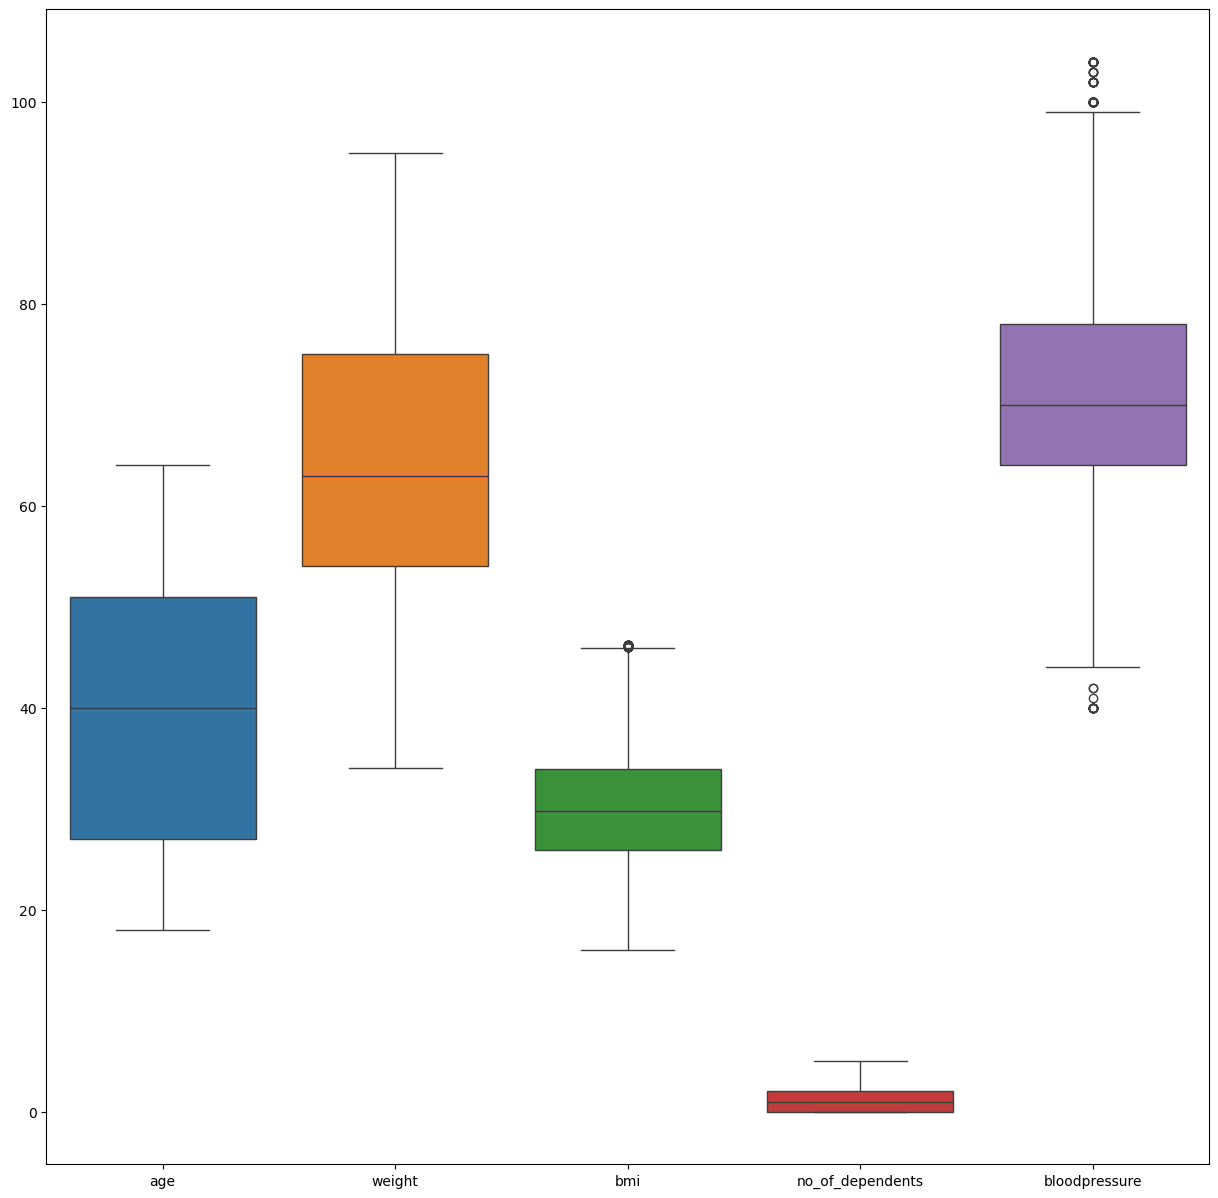

In [40]:
df_numerics=df1.select_dtypes(exclude='O').drop('claim', axis=1)
plt.figure(figsize=(15, 15))
sns.boxplot(df_numerics)
plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that you see are moderate outliers that lie within the min/max range before removing the actual outliers

<a id='Recheck_Correlation'></a>
### 4.1.10 Recheck the Correlation
Recheck the correlation after treating outliers. An outlier might either decrease or increase a correlation coefficient, depending on where it is in relation to the other points

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Recheck the correlation after removing the outliers:<br>
                    1. Filter out only the numeric variables from the dataframe<br>
                    2. Call the corr() function which will return the correlation matrix of numeric variables <br>
                    3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Filter out only the numeric variables from the dataframe**

In [41]:
df_numerics=df1.select_dtypes(exclude='O')
cor=df_numerics.corr()
cor

,age,weight,bmi,no_of_dependents,bloodpressure,claim
age,1.000000,0.282136,0.196479,0.056423,0.022225,0.301544
weight,0.282136,1.000000,0.237473,0.134033,0.007824,0.080363
bmi,0.196479,0.237473,1.000000,0.044997,-0.056284,0.196193
no_of_dependents,0.056423,0.134033,0.044997,1.000000,0.027408,0.077775
bloodpressure,0.022225,0.007824,-0.056284,0.027408,1.000000,0.036070
claim,0.301544,0.080363,0.196193,0.077775,0.036070,1.000000


**2.  Call the corr() function which will return the correlation matrix of numeric variables**

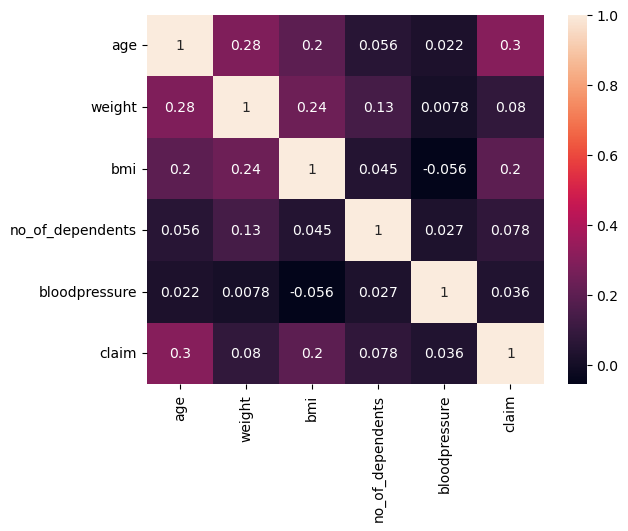

In [42]:
sns.heatmap(cor, annot=True)
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It is seen that the numeric variables are not correlated with each other even after removing the outliers since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data <br><br>
                       <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Preparation'></a>
## 4.2 Prepare the Data

<a id='Normality'></a>
### 4.2.1 Check for Normality

As per the assumptions of linear regression, residuals (actual values - predicted values) should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed, thus we check the normality only for target variable.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In order to check for normality of our target variable, <br>
                        1. Plot a histogram and also perform the Jarque-Bera test <br>
                        2. If the data is not normally distributed, use log transformation to get near normally distributed data <br>
                        3. Recheck for normality by plotting histogram and performing Jarque-Bera test
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>




**1. Plot a histogram and also perform the Jarque-Bera test**

To plot a histogram, we use the hist() function from the matplotlib library

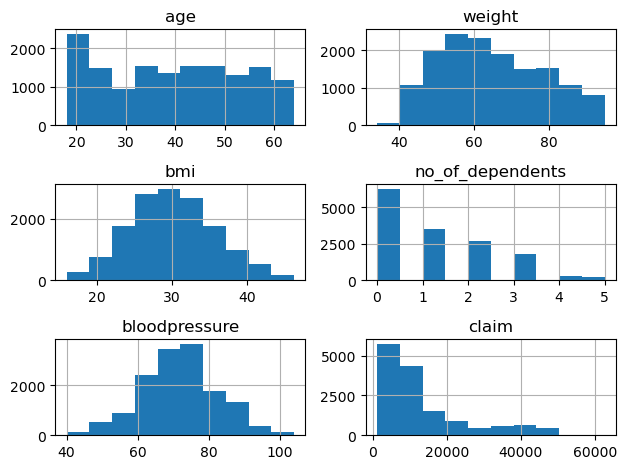

In [43]:
df1.hist()
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we can notice that the variable 'claim' is heavily right skewed and not normally distributed<br>
<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>




<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insights</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us perform the Jarque-Bera test to check the normality of the target variable.

The null and alternate hypothesis of Jarque-Bera test are as follows: <br>
    
    H0: The data is normally distributed
    H1: The data is not normally distributed

In [44]:
jarque_bera(df1['claim'])

SignificanceResult(statistic=6571.029554188422, pvalue=0.0)

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the data is not normally distributed.<br><br>
                        Now we opt for log transformation in order to reduce the skewness. We will log transform the claim variable. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Usually for testing the normality of data, the Shaprio Wilk Test is used. However, it does not work if the number of observations are more than 5000 inspite it being more robust than other tests. In case where the observations are more than 5000, other tests like Anderson Darling test or Jarque Bera test may also be used. So we have used Jarque Bera test</b>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**2. If the data is not normally distributed, use log transformation to get near normally distributed data**

As mentioned above we opt for log transformation. The log transformation can be used to make highly skewed distributions less skewed. We use np.log() to log transform the 'claim' variable. We also store the transformed variable into our data frame with a new name, 'log_claim'.

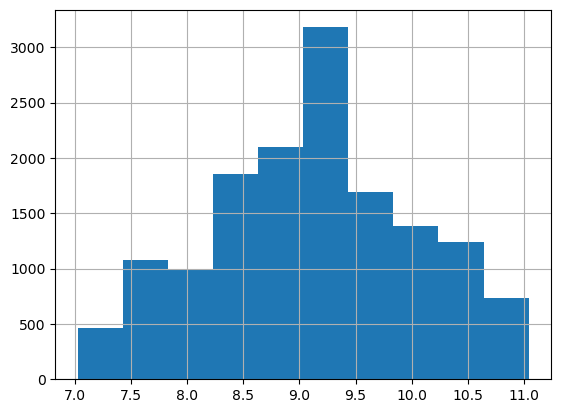

In [45]:
df1['log_claim']=np.log(df1['claim'])
df1['log_claim'].hist()
plt.show()

**3. Recheck for normality by plotting histogram and performing Jarque-Bera test**

Let us first plot a histogram of `log_claim`

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be seen that the variable claim is near normally distributed. However we again confirm by Jarque Bera test</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us perform Jarque Bera test

In [46]:
jarque_bera(df1['log_claim'])

SignificanceResult(statistic=244.1870795409464, pvalue=9.450382824415435e-54)

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be visually seen that the data has near-normal distribution, but Jarque Bera test does not support the claim
<br>                    
Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='one_way_anova'></a>
### 4.2.2 One-Way Anova 

Perform One-Way ANOVA to compare two means from two independent (unrelated) groups. For example, we apply ANOVA to see whether the mean of claim is significantly different across gender<br>

The null and alternate hypothesis of one-way anova are as follows:<br>

    H0: Population means all are equal
    H1: Population means are not all equal

#### One Way Anova for 'Sex' on 'Claim'

The F-statistic = 68.99 and the p-value < 0.05, which indicates that there is a significant difference in the mean of the insurance claim across gender. We may consider building separate models for each gender. However, in this example we go ahead and build a single model for both genders.

<a id='dummy'></a>
### 4.2.3 Dummy Encoding of Categorical Variables

To build linear regression models we use OLS method. As seen before in section 4.1.2, it is seen that some variables are categorical. The OLS method fails to perform in presence of categorical variables. To overcome this we use dummy encoding.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> We need to perform dummy encoding on our categorical variables before we proceed, since the method of OLS works only on numeric data <br><br>
                    In order to dummy encode, we do the following: <br>
                    1. Filter numerical and categorical variables<br>
                    2. Dummy encode the catergorical variables<br>
                    3. Concatenate numerical and dummy encoded categorical variables<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Filter numerical and categorical variables**

In [47]:
# use get_dummies for categorical encoding
df_ols=pd.get_dummies(df1, drop_first=True).astype('float64')
df_ols.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim',
       'log_claim', 'sex_male', 'hereditary_diseases_Arthritis',
       'hereditary_diseases_Cancer', 'hereditary_diseases_Diabetes',
       'hereditary_diseases_Epilepsy', 'hereditary_diseases_EyeDisease',
       'hereditary_diseases_HeartDisease', 'hereditary_diseases_High BP',
       'hereditary_diseases_NoDisease', 'hereditary_diseases_Obesity',
       'smoker_1', 'diabetes_1', 'regular_ex_1', 'job_title_Accountant',
       'job_title_Actor', 'job_title_Analyst', 'job_title_Architect',
       'job_title_Beautician', 'job_title_Blogger', 'job_title_Buisnessman',
       'job_title_CA', 'job_title_CEO', 'job_title_Chef', 'job_title_Clerks',
       'job_title_Dancer', 'job_title_DataScientist',
       'job_title_DefencePersonnels', 'job_title_Doctor', 'job_title_Engineer',
       'job_title_Farmer', 'job_title_FashionDesigner',
       'job_title_FilmDirector', 'job_title_FilmMaker',
       'job_title_GovEmploy

In [48]:
df_ols.head(2)

,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1,job_title_Accountant,job_title_Actor,job_title_Analyst,job_title_Architect,job_title_Beautician,job_title_Blogger,job_title_Buisnessman,job_title_CA,job_title_CEO,job_title_Chef,job_title_Clerks,job_title_Dancer,job_title_DataScientist,job_title_DefencePersonnels,job_title_Doctor,job_title_Engineer,job_title_Farmer,job_title_FashionDesigner,job_title_FilmDirector,job_title_FilmMaker,job_title_GovEmployee,job_title_HomeMakers,job_title_HouseKeeper,job_title_ITProfessional,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North East,region_South,region_West
0,60.000000,64.000000,24.300000,1.000000,72.000000,13112.600000,9.481329,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,49.000000,75.000000,22.600000,1.000000,78.000000,9567.000000,9.166075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Thus we have obtained the dummy coded variables. <br><br>
                        Note: Now the categorical variables are dummy encoded creating n-1 variables for each categorical variables, where n is the number of classes in each categorical variable. So for variable 'region', which has 5 levels, it has created 4 dummy encoded variables. Similarly, variable 'smoker' has 2 levels and it has created 1 dummy encoded variable.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are various forms of encoding like n-1 dummy encoding, one hot encoding, label encoding, frequency encoding</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>I love to know more:</b> <br><br>
                    <a href="https://bit.ly/36nZQKg">1. FAQ: What is Dummy Coding? <br>
                    <a href="https://bit.ly/2q9Omt9">2. Encoding Categorical Features
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let us now proceed to train models. One model with the original claim variable and another model with the log transformed claim variable. We shall begin by fitting a linear regression model using the method of ordinary least square(OLS) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='LinearRegression'></a>
## 5. Linear Regression (OLS)

<a id='withLog'></a>
### 5.1 Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to build the model, we do the following: <br>
                       1. Split the data into training and test sets<br>
                       2. Build model using sm.OLS().fit()<br>
                       3. Predict the values using test set <br>
                       4. Compute accuracy measures <br>
                       5. Tabulate the results
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**1. Split the data into training and test sets**

In [49]:
df_ols.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim',
       'log_claim', 'sex_male', 'hereditary_diseases_Arthritis',
       'hereditary_diseases_Cancer', 'hereditary_diseases_Diabetes',
       'hereditary_diseases_Epilepsy', 'hereditary_diseases_EyeDisease',
       'hereditary_diseases_HeartDisease', 'hereditary_diseases_High BP',
       'hereditary_diseases_NoDisease', 'hereditary_diseases_Obesity',
       'smoker_1', 'diabetes_1', 'regular_ex_1', 'job_title_Accountant',
       'job_title_Actor', 'job_title_Analyst', 'job_title_Architect',
       'job_title_Beautician', 'job_title_Blogger', 'job_title_Buisnessman',
       'job_title_CA', 'job_title_CEO', 'job_title_Chef', 'job_title_Clerks',
       'job_title_Dancer', 'job_title_DataScientist',
       'job_title_DefencePersonnels', 'job_title_Doctor', 'job_title_Engineer',
       'job_title_Farmer', 'job_title_FashionDesigner',
       'job_title_FilmDirector', 'job_title_FilmMaker',
       'job_title_GovEmploy

**2. Build model using sm.OLS().fit()**

In [51]:
# seperate the feature and label
X= df_ols.drop(['claim', 'log_claim'], axis=1)
y= df_ols[['claim', 'log_claim']]

# add a constant to features
X=sm.add_constant(X)
#X.head(2)

# train test split
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, 
                                                  random_state=1)
print(x_train.shape,y_train.shape)
print(x_test.shape, y_test.shape)

# fit the model and get the summary
import statsmodels.api as sm 
model=sm.OLS(y_train['log_claim'], x_train).fit()
model.summary()

(10306, 56) (10306, 2)
(4417, 56) (4417, 2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_claim   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     549.5
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:56:57   Log-Likelihood:                -6598.6
No. Observations:               10306   AIC:                         1.331e+04
Df Residuals:                   10250   BIC:                         1.371e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                7.6164      0.073    104.899      0.000       7.474       7.759
age                                  0.0334      0.000     90.414      0.000       0.033       0.034
weight                              -0.0004      0.000     -1.094      0.274      -0.001       0.000
bmi                                  0.0089      0.001     10.342      0.000       0.007       0.011
no_of_dependents                     0.0927      0.004     24.348      0.000       0.085       0.100
bloodpressure                        0.0014      0.000      3.234      0.001       0.001       0.002
sex_male                            -0.0795      0.009     -8.409      0.000      -0.098      -0.061
hereditary_diseases_Arthritis        0.2238      0.071      3.172      0.002       0.086       0.362
hereditary_diseases_Cancer          -0.2804      0.071     -3.960      0.000      -0.419      -0.142
hereditary_diseases_Diabetes        -0.2229      0.065     -3.407      0.001      -0.351      -0.095
hereditary_diseases_Epilepsy        -0.2179      0.079     -2.773      0.006      -0.372      -0.064
hereditary_diseases_EyeDisease      -0.2638      0.070     -3.793      0.000      -0.400      -0.127
hereditary_diseases_HeartDisease    -0.0612      0.075     -0.817      0.414      -0.208       0.086
hereditary_diseases_High BP         -0.4263      0.083     -5.115      0.000      -0.590      -0.263
hereditary_diseases_NoDisease       -0.6209      0.047    -13.301      0.000      -0.712      -0.529
hereditary_diseases_Obesity         -0.2463      0.065     -3.800      0.000      -0.373      -0.119
smoker_1                             1.3465      0.013    101.609      0.000       1.321       1.372
diabetes_1                           0.0610      0.011      5.436      0.000       0.039       0.083
regular_ex_1                         0.0156      0.011      1.397      0.162      -0.006       0.037
job_title_Accountant                 0.1002      0.044      2.301      0.021       0.015       0.185
job_title_Actor                      0.0327      0.038      0.860      0.390      -0.042       0.107
job_title_Analyst                   -0.0283      0.046     -0.608      0.543      -0.119       0.063
job_title_Architect                  0.0385      0.044      0.878      0.380      -0.047       0.124
job_title_Beautician                 0.0647      0.043      1.494      0.135      -0.020       0.150
job_title_Blogger                   -0.0685      0.046     -1.476      0.140      -0.159       0.022
job_title_Buisnessman                0.0445      0.049      0.918      0.359      -0.051       0.140
job_title_CA                         0.0364      0.047      0.781      0.435      -0.055       0.128
job_title_CEO                        0.0227      0.04

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 74.5% of the variation in dependent variable claim.The Durbin-Watson test statistics is 2.008 and indicates that there is no autocorrelation. The Condition Number 4610 suggests that there is severe collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Condition Number : One way to assess multicollinearity is to compute the condition number(CN). If CN is less than 100, there is no multicollinearity. If CN is between 100 and 1000, there is moderate multicollinearity and if CN is greater 1000 there is severe multicollinearity in the data <br><br>
                        Durbin-Watson : The Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation      
                </font>
            </div>
        </td>
    </tr>
</table>

**3. Predict the values using test set**

In [52]:
predicted=np.exp(model.predict(x_test))
actual=y_test['claim']
result=pd.DataFrame({'actual':actual, 'predicted':predicted})
result.head()

,actual,predicted
13274,9634.500000,10050.145020
12520,1837.300000,2930.803674
12458,12096.700000,11635.232643
1946,11454.000000,10602.249960
3351,28923.100000,12401.126813


<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Note that the predicted values are log transformed claim. In order to get claim values, we take the antilog of these predicted values by using the function np.exp()
</b>
                </font>
            </div>
        </td>
    </tr>
</table>



**4. Compute accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [53]:
from statsmodels.tools.eval_measures import rmse
rmse=rmse(actual, predicted)
r2=model.rsquared
r2_adj=model.rsquared_adj

# create a empty data frame to store the metrics 
score_card=pd.DataFrame(columns=['model', 'rmse', 'r2', 'r2_adj'])
score_card

,model,rmse,r2,r2_adj


**5. Tabulate the results**

In [54]:
#del score_card

In [55]:
m1=pd.Series({
    'model':'Model with log claim',
    'rmse':rmse,
    'r2':r2,
    'r2_adj':r2_adj
})
m1_df=m1.to_frame().T
score_card=pd.concat([score_card, m1_df], ignore_index=True)
score_card

,model,rmse,r2,r2_adj
0,Model with log claim,8109.303613,0.746759,0.745400


<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let us also take a look at building a linear regression full model without performing any kind of transformation on target variable
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='withoutLog'></a>
### 5.2 Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

In this case, we do not consider any kind of transformation on the dependent variable, we use the 'claim' variable as it is.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> We do not need to do the train and test split again since it has been done while building the previous model<br><br>
                       In order to build the model, we do the following: <br>
                       1. Build model using sm.OLS().fit()<br>
                       2. Predict the values using test set <br>
                       3. Compute the accuracy measures <br>
                       4. Tabulate the results
</b>
                </font>
            </div>
        </td>
    </tr>
</table>



**1. Build model using sm.OLS().fit()**

In [56]:
model=sm.OLS(y_train['claim'], x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     615.8
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:57:09   Log-Likelihood:            -1.0403e+05
No. Observations:               10306   AIC:                         2.082e+05
Df Residuals:                   10250   BIC:                         2.086e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1906.7124    926.471      2.058      0.040      90.648    3722.776
age                                265.4920      4.715     56.305      0.000     256.249     274.735
weight                             -40.8740      4.738     -8.627      0.000     -50.161     -31.587
bmi                                231.2355     10.984     21.053      0.000     209.705     252.766
no_of_dependents                   489.9432     48.560     10.089      0.000     394.756     585.130
bloodpressure                       25.4870      5.524      4.614      0.000      14.658      36.316
sex_male                            67.5270    120.577      0.560      0.575    -168.827     303.882
hereditary_diseases_Arthritis    -2464.7457    900.252     -2.738      0.006   -4229.415    -700.077
hereditary_diseases_Cancer         429.6566    903.634      0.475      0.634   -1341.642    2200.955
hereditary_diseases_Diabetes     -2309.7664    834.590     -2.768      0.006   -3945.727    -673.806
hereditary_diseases_Epilepsy       -93.9275   1002.599     -0.094      0.925   -2059.218    1871.363
hereditary_diseases_EyeDisease   -2516.5436    887.507     -2.836      0.005   -4256.230    -776.857
hereditary_diseases_HeartDisease  4145.4740    956.102      4.336      0.000    2271.326    6019.622
hereditary_diseases_High BP      -2859.4447   1063.298     -2.689      0.007   -4943.717    -775.173
hereditary_diseases_NoDisease    -1.155e+04    595.646    -19.396      0.000   -1.27e+04   -1.04e+04
hereditary_diseases_Obesity       -851.4813    826.919     -1.030      0.303   -2472.403     769.441
smoker_1                          2.012e+04    169.095    118.999      0.000    1.98e+04    2.05e+04
diabetes_1                        1186.4814    143.147      8.289      0.000     905.886    1467.077
regular_ex_1                      -909.1707    142.216     -6.393      0.000   -1187.942    -630.399
job_title_Accountant               693.9027    555.405      1.249      0.212    -394.799    1782.604
job_title_Actor                   -262.8608    485.402     -0.542      0.588   -1214.344     688.623
job_title_Analyst                -1581.1923    593.069     -2.666      0.008   -2743.723    -418.661
job_title_Architect                832.4866    559.506      1.488      0.137    -264.255    1929.228
job_title_Beautician               406.9665    552.718      0.736      0.462    -676.468    1490.401
job_title_Blogger                 -848.3021    592.024     -1.433      0.152   -2008.785     312.180
job_title_Buisnessman               50.6062    619.033      0.082      0.935   -1162.820    1264.033
job_title_CA                       229.0545    594.006      0.386      0.700    -935.314    1393.423
job_title_CEO                      588.8781    543.39

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 76.5% of the variation in dependent variable claim.The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 4610 suggests that there is severe collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [57]:
predicted=model.predict(x_test)
actual=y_test['claim']
result=pd.DataFrame({'actual':actual, 'predicted':predicted})
print(result.head())

#metrics for score card
from statsmodels.tools.eval_measures import rmse
rmse=rmse(actual, predicted)
r2=model.rsquared
r2_adj=model.rsquared_adj

            actual    predicted
13274  9634.500000 12010.078200
12520  1837.300000  3890.736360
12458 12096.700000 13334.272606
1946  11454.000000 11983.192612
3351  28923.100000 12831.324043


In [58]:
m2=pd.Series({
    'model':'Model without log claim',
    'rmse':rmse,
    'r2':r2,
    'r2_adj':r2_adj
})
m2_df=m2.to_frame().T
score_card=pd.concat([score_card, m2_df], ignore_index=True)
score_card

,model,rmse,r2,r2_adj
0,Model with log claim,8109.303613,0.746759,0.745400
1,Model without log claim,5961.173032,0.767679,0.766432


#### Calculate the p-values to know the insignificant variables

In [59]:
pval=pd.DataFrame(model.pvalues, columns=['Pvals'])
pval[pval['Pvals']>0.05].index.to_list()

['sex_male',
 'hereditary_diseases_Cancer',
 'hereditary_diseases_Epilepsy',
 'hereditary_diseases_Obesity',
 'job_title_Accountant',
 'job_title_Actor',
 'job_title_Architect',
 'job_title_Beautician',
 'job_title_Blogger',
 'job_title_Buisnessman',
 'job_title_CA',
 'job_title_CEO',
 'job_title_Chef',
 'job_title_Clerks',
 'job_title_Dancer',
 'job_title_DefencePersonnels',
 'job_title_Doctor',
 'job_title_Farmer',
 'job_title_FashionDesigner',
 'job_title_FilmDirector',
 'job_title_FilmMaker',
 'job_title_GovEmployee',
 'job_title_HomeMakers',
 'job_title_HouseKeeper',
 'job_title_ITProfessional',
 'job_title_Journalist',
 'job_title_Labourer',
 'job_title_Lawyer',
 'job_title_Police',
 'job_title_Singer',
 'job_title_Technician',
 'region_North East',
 'region_South',
 'region_West']

The above table shows the p-values for all the variables to decide the significant variables

Let's create a list of insignificant variables

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> These are the insignificant variables because their p-value is greater than 0.05.<br><br>

Notice, the variable 'sex_male' is insignificant. It implies that a persons gender does not affect the claim. Hence, we shall consider this variable to be insignificant.<br><br>
Out of the 9 hereditary diseases, there are 3 diseases which are insignificant. Considering, 'hereditary diseases' as whole we must include it in the data. <br><br>
There are 25, out of the total 35, professions/designations which are insignificant. Hence, it can be considered as redundant variable.<br><br>
Similarly for the variable region only 1 region is significantly contributing to the target variable. So we shall exclude the variable.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> On comparing the above models, it is seen that the R-squared and the Adjusted R-squared value for the model considering log transformation of the variable 'claim' is lower than the other model. And, the RMSE value of the model without considering the log transformation is considerably lower. So, we continue with variable 'claim' as it is, instead of opting for log transformation
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Finetuning'></a>
## 5.3. Fine Tune Linear Regression Model (OLS)

<a id='RemovingInsignificantVariable'></a>
### 5.3.1 Linear Regression after Removing Insignificant Variable (OLS)

The null and alternate hypothesis of linear regression as follows: <br>
    
    H0: All beta coefficients are zero
    H1: At least one beta coefficient is not zero

From the summary output of our linear regression model in section 5.2, we notice some of the variables are insignificant.

Now, we go ahead and build our next model without considering the above mentioned insignificant variables.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to build the linear regression model after removing insignificant variable, we do the following: <br>
                       1. Consider the significant variables <br>
                       2. Split the data into training and test sets<br>
                       3. Build model using sm.OLS().fit()<br>
                       4. Predict the values using test set<br>
                       5. Compute accuracy measures <br>
                       6. Tabulate the results<br><br>
                       Note: We won't split the data into train and test set again since it has been done while building the previous model</b>
                </font>
            </div>
        </td>
    </tr>
</table>



**1. Consider the significant variables**

In [60]:
df1.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'bloodpressure', 'diabetes', 'regular_ex',
       'job_title', 'claim', 'region', 'log_claim'],
      dtype='object')

In [61]:
df3=df1.drop(['log_claim','sex', 'region','job_title'], axis=1)

**Dummy encode the catergorical variables**

In [62]:
df_ols_new=pd.get_dummies(df3, drop_first=True).astype('float64')

**2. Split the data into training and test sets**

In [64]:
# split the label and features
X=df_ols_new.drop('claim', axis=1)
y=df_ols_new['claim']

# add the constant
X=sm.add_constant(X)

# train_test_split
x_train, x_test, y_train, y_test=\
                train_test_split(X, y, test_size=0.3, random_state=1)

**1. Build model using sm.OLS().fit()**

In [65]:
model=sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1950.
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:57:33   Log-Likelihood:            -1.0413e+05
No. Observations:               10306   AIC:                         2.083e+05
Df Residuals:                   10288   BIC:                         2.084e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             2287.8470    830.381      2.755      0.006     660.139    3915.555
age                                262.1282      4.444     58.991      0.000     253.418     270.838
weight                             -39.7581      4.616     -8.612      0.000     -48.807     -30.709
bmi                                228.6057     10.903     20.967      0.000     207.233     249.978
no_of_dependents                   464.4047     48.130      9.649      0.000     370.061     558.748
bloodpressure                       29.3329      5.504      5.329      0.000      18.544      40.122
hereditary_diseases_Arthritis    -2350.4290    897.316     -2.619      0.009   -4109.342    -591.516
hereditary_diseases_Cancer         -39.3120    897.568     -0.044      0.965   -1798.719    1720.095
hereditary_diseases_Diabetes     -2106.7140    837.247     -2.516      0.012   -3747.881    -465.547
hereditary_diseases_Epilepsy       196.6312    998.885      0.197      0.844   -1761.377    2154.640
hereditary_diseases_EyeDisease   -2270.6706    880.496     -2.579      0.010   -3996.614    -544.727
hereditary_diseases_HeartDisease  3596.6054    944.394      3.808      0.000    1745.410    5447.801
hereditary_diseases_High BP      -2403.4382   1056.480     -2.275      0.023   -4474.344    -332.532
hereditary_diseases_NoDisease    -1.162e+04    594.589    -19.541      0.000   -1.28e+04   -1.05e+04
hereditary_diseases_Obesity       -958.4204    826.461     -1.160      0.246   -2578.444     661.603
smoker_1                          2.017e+04    166.655    121.047      0.000    1.98e+04    2.05e+04
diabetes_1                        1176.7834    142.379      8.265      0.000     897.693    1455.874
regular_ex_1                      -919.9872    141.727     -6.491      0.000   -1197.800    -642.175
==============================================================================
Omnibus:                     2946.213   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9618.493
Skew:                           1.447   Prob(JB):                         0.00
Kurtosis:                       6.745   Cond. No.                     3.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
predicted=model.predict(x_test)
actual=y_test
from statsmodels.tools.eval_measures import rmse
rmse=rmse(actual, predicted)
r2=model.rsquared
r2_adj=model.rsquared_adj

In [76]:
#score_card.drop(index=3,inplace=True)

In [77]:
m3=pd.Series({
    'model':'Model with significant variables',
    'rmse':rmse,
    'r2':r2,
    'r2_adj':r2_adj
})
m3_df=m3.to_frame().T
score_card=pd.concat([score_card, m3_df], ignore_index=True)
score_card

,model,rmse,r2,r2_adj
0,Model with log claim,8109.303613,0.746759,0.745400
1,Model without log claim,5961.173032,0.767679,0.766432
2,Model with significant variables,5958.861082,0.763183,0.762791


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 76.1% of the variation in dependent variable claim.The Durbin-Watson test statistics is  1.982 and indicates that there is no autocorrelation. The Condition Number is 3670 suggests that there is severe collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Occams razor is a principle to explain the phenomena by the simplest hypothesis possible. Our last model where we have removed the insignificant variables is performimg very close to the other models inspite of having lesser number of variables. Using Occams razor principle, we accept the model in which we consider the model with significant variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Assumptions'></a>
### 5.3.2 Check the Assumptions of the Linear Regression

Now we perform test for checking presence of Autocorrelation and Heteroskedasticity.

<a id='Autocorrelation'></a>
### 5.3.2.1 Detecting Autocorrelation

Autocorrelation (also called serial correlation) refers to the degree of correlation between the values of the same variables across different observations in the data. One of the assumptions of the linear regression is that there should not be autocorrelation.

The Durbin Watson Test is a measure of autocorrelation in residuals from the regression analysis.
Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

The null and alternate hypothesis of Durbin-Watson test is as follows: <br>
        
          H0: There is no autocorrelation in the residuals
          H1: There is autocorrelation in the residuals

**The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation**

**From the summary output in section 5.3.1, we see that the Durbin-Watson static is  1.980**

**Hence we can conclude that there is no autocorrelation**

In [78]:
dw=durbin_watson(model.resid)
print(dw)

1.98560327179545


<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We can also find out the p-value associated with the Durbin-Watson statistic from Durbin_Watson table in order to reject or fail to reject the null hypothesis. Reference URL: <a href="https://bit.ly/36DJDR8">Durbin-Watson Table</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Heteroskedasticity'></a>
### 5.3.2.2 Detecting Heteroskedasticity
Heteroskedasticity is a systematic change in the spread of the residuals over the range of measured values. One of the assumptions of the linear regression is that there should not be Heteroskedasticity.

Breusch-Pagan is the test for detecting heteroskedasticity:

The null and alternate hypothesis of Breusch-Pagan test is as follows:<BR>
    
    H0: The residuals are homoskedastic
    H1: The residuals are not homoskedastic

In [79]:
# create vector of result parmeters
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['f-value','p-value']   
# perform Breusch-Pagan test using het_breushpagan()
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(model.resid, model.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
lzip(name, test)           

[('f-value', 946.5165630836079), ('p-value', 2.451913193295987e-190)]

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We observe that p-value is less than 0.05 and thus reject the null hypothesis. We conclude that there is heteroskedasticity present in the data. In real life it might not be possible to meet all the assumptions of linear regression.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


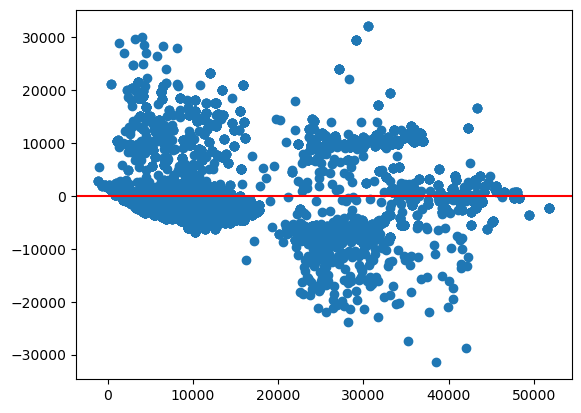

In [80]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='r')
plt.show()

<a id='Linearity_of_Residuals'></a>
### 5.3.2.3 Linearity of Residuals

Multiple linear regression requires the relationship between the independent and dependent variables to be linear, i.e. it should be linear in the parameters. The linearity assumption can best be tested with scatterplots.<br><br>The independent variables must have a linear relationship with the dependent variable.

In [81]:
# draw a pairplot 

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the plots we see that none of the plots show a specific pattern. Hence, we may conclude that the variables are linearly related to the dependent variable.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Normality_of_Residuals'></a>
### 5.3.2.4 Normality of Residuals

The assumption of normality is an important assumption for many statistical tests. The normal Q-Q plot is one way to assess normality. This q-q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution in a data set.

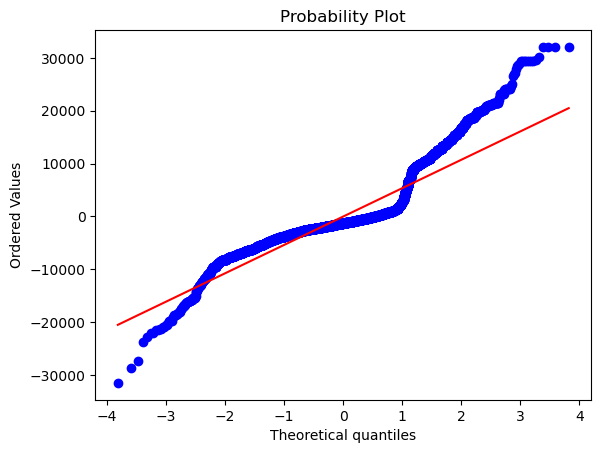

In [83]:
stats.probplot(model.resid, plot=plt)
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Using this plot, we can infer that the residuals do not come from a normal distribution. This is possible since our target variable is not normally distributed.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: >

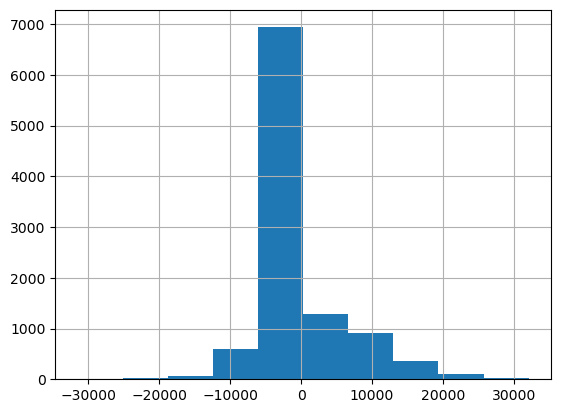

In [84]:
model.resid.hist()

**The mean of the residuals always equals zero (assuming that your line is actually the line of “best fit”)** 

The mean of the residuals is very much closer to zero. Therefore, we can say that linearity is present.

**Perform Jarque Bera test to check normality of the residuals**

In [85]:
jarque_bera(model.resid)

SignificanceResult(statistic=9618.493212917736, pvalue=0.0)

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the residuals is not normally distributed.<br><br>
                    </b> </font>
            </div>
        </td>
    </tr>
</table>


<a id='RemovingInsignificantVariable_scaleddata'></a>
### 5.3.3 Linear Regression after Removing Insignificant Variable (OLS) - Scaled Data

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.<br><br>
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).<br><br>

Let's build a model on significant variables using standardization.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>To build the linear regression model after removing insignificant variable on standardized data, we do the following: <br>
                       1. Perform standardization on data<br>
                       2. Split the data into training and test sets<br>
                       3. Consider only the significant variables<br>
                       4. Build model using sm.OLS().fit()<br>
                       5. Predict the values using test set<br>
                       6. Compute accuracy measures <br>
                       7. Tabulate the results<br><br>
                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>



**1. Perform standardization on train data**

In [94]:
scale=lambda x: (x-x.mean())/x.std()
df_numerics=df_numerics.apply(scale, axis=1)
df_numerics.head(2)

,age,weight,bmi,no_of_dependents,bloodpressure
0,0.519162,0.651096,-0.658352,-1.426870,0.914965
1,0.116423,0.896577,-0.675734,-1.323862,0.986595


In [95]:
df_categorics.head(2)

,hereditary_diseases,smoker,diabetes,regular_ex
0,NoDisease,0,0,0
1,NoDisease,0,1,1


In [96]:
df4=pd.concat([df_numerics, df_categorics], axis=1)
df4.head(2)

,age,weight,bmi,no_of_dependents,bloodpressure,hereditary_diseases,smoker,diabetes,regular_ex
0,0.519162,0.651096,-0.658352,-1.426870,0.914965,NoDisease,0,0,0
1,0.116423,0.896577,-0.675734,-1.323862,0.986595,NoDisease,0,1,1


In [97]:
X=pd.get_dummies(df4, drop_first=True).astype('float64')
y=df3['claim']
X=sm.add_constant(X)

x_train, x_test, y_train, y_test=\
                train_test_split(X, y, test_size=0.3, random_state=1)

**2. Split the data into training and test sets**

In [98]:
X.head()

,const,age,weight,bmi,no_of_dependents,bloodpressure,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1
0,1.000000,0.519162,0.651096,-0.658352,-1.426870,0.914965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.116423,0.896577,-0.675734,-1.323862,0.986595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
2,1.000000,-0.250851,0.665499,-0.657481,-1.109928,1.352761,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
3,1.000000,0.590201,0.300887,-0.299440,-1.579654,0.988007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
4,1.000000,-0.477351,0.488568,-0.427497,-1.069365,1.485645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000


**4. Build model using sm.OLS().fit()**

In [99]:
model=sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1794.
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:04:32   Log-Likelihood:            -1.0469e+05
No. Observations:               10306   AIC:                         2.094e+05
Df Residuals:                   10289   BIC:                         2.095e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1.556e+04   2071.626      7.510      0.000    1.15e+04    1.96e+04
age                               7230.5354    137.557     52.564      0.000    6960.897    7500.174
weight                           -1306.9484    424.679     -3.077      0.002   -2139.402    -474.495
bmi                                968.2952    331.187      2.924      0.003     319.105    1617.485
no_of_dependents                 -5355.2054    782.238     -6.846      0.000   -6888.545   -3821.866
bloodpressure                    -1536.6768    540.049     -2.845      0.004   -2595.278    -478.076
hereditary_diseases_Arthritis    -2862.5961    947.936     -3.020      0.003   -4720.736   -1004.457
hereditary_diseases_Cancer        1690.6596    946.090      1.787      0.074    -163.861    3545.180
hereditary_diseases_Diabetes     -1267.4724    882.844     -1.436      0.151   -2998.017     463.073
hereditary_diseases_Epilepsy       453.0650   1054.434      0.430      0.667   -1613.831    2519.961
hereditary_diseases_EyeDisease   -1705.4289    932.890     -1.828      0.068   -3534.074     123.216
hereditary_diseases_HeartDisease  3827.5713    996.581      3.841      0.000    1874.079    5781.064
hereditary_diseases_High BP      -2208.8713   1114.723     -1.982      0.048   -4393.946     -23.797
hereditary_diseases_NoDisease    -1.189e+04    627.995    -18.930      0.000   -1.31e+04   -1.07e+04
hereditary_diseases_Obesity       -797.1308    873.128     -0.913      0.361   -2508.631     914.369
smoker_1                          2.006e+04    175.981    113.973      0.000    1.97e+04    2.04e+04
diabetes_1                        1570.2248    149.723     10.488      0.000    1276.739    1863.711
regular_ex_1                      -748.0330    149.640     -4.999      0.000   -1041.356    -454.710
==============================================================================
Omnibus:                     2625.841   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7473.833
Skew:                           1.338   Prob(JB):                         0.00
Kurtosis:                       6.200   Cond. No.                     1.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.92e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 76.4% of the variation in dependent variable claim.The Durbin-Watson test statistics is  1.982 and indicates that the is no autocorrelation. The Condition Number is 30.4 suggests that there is no collinearity
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**5. Predict the values using test set**

In [100]:
predicted=model.predict(x_test)
actual=y_test
from  statsmodels.tools.eval_measures import rmse
rmse=rmse(actual, predicted)
r2=model.rsquared
r2_adj=model.rsquared_adj


In [101]:
score_card.drop(index=3, inplace=True)

KeyError: '[3] not found in axis'

In [102]:
m4=pd.Series({
    'model':'Model with scaled numerical features',
    'rmse':rmse,
    'r2':r2,
    'r2_adj':r2_adj
})
m4_df=m4.to_frame().T
score_card=pd.concat([score_card, m4_df], ignore_index=True)
score_card

,model,rmse,r2,r2_adj
0,Model with log claim,8109.303613,0.746759,0.745400
1,Model without log claim,5961.173032,0.767679,0.766432
2,Model with significant variables,5958.861082,0.763183,0.762791
3,Model with scaled numerical features,6255.163326,0.736130,0.735720


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> On comparing the above models, it is seen that the RMSE value for the model considering scaled data is higher than the other model. Also the R-squared and Adj. R-squared values have slightly reduced. So, for further analysis we use the unscaled data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Interaction'></a>
### 5.3.4 Linear Regression with Interaction (OLS)

Let us now see the effect on the linear regression model on adding an interaction effect of two significant variables

An interaction effect occurs when the effect of one variable depends on another variable. This combined effect may or may not improve the performance of the model

Comparing the coefficient of determination with and without the interaction term:<br>
The model for which interaction term is considered, the coefficient of determination may vary. It is crucial to check for the significance of the interaction term. If the term is found to be significant then the coefficient of determination increases. If the term is not significant, there is not much change in the coefficient of determination.
[Ref:https://bit.ly/2Nm0Wi7]


<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to build the model, we do the following: <br>
                       1. Compute the interaction effect<br>
                       2. Split the data into training and test sets<br>
                       3. Build model using sm.OLS().fit()<br>
                       4. Predict the values using test set<br>
                       5. Compute accuracy measures <br>
                       6. Tabulate the results
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**1. Compute the interaction effect**

In [103]:
df5=df1.drop('log_claim', axis=1)
df5.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'bloodpressure', 'diabetes', 'regular_ex',
       'job_title', 'claim', 'region'],
      dtype='object')

In [104]:
df_ols_interaction=pd.get_dummies(df5, drop_first=True).astype('float64')
df_ols_interaction.head(2)

,age,weight,bmi,no_of_dependents,bloodpressure,claim,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1,job_title_Accountant,job_title_Actor,job_title_Analyst,job_title_Architect,job_title_Beautician,job_title_Blogger,job_title_Buisnessman,job_title_CA,job_title_CEO,job_title_Chef,job_title_Clerks,job_title_Dancer,job_title_DataScientist,job_title_DefencePersonnels,job_title_Doctor,job_title_Engineer,job_title_Farmer,job_title_FashionDesigner,job_title_FilmDirector,job_title_FilmMaker,job_title_GovEmployee,job_title_HomeMakers,job_title_HouseKeeper,job_title_ITProfessional,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North East,region_South,region_West
0,60.000000,64.000000,24.300000,1.000000,72.000000,13112.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,49.000000,75.000000,22.600000,1.000000,78.000000,9567.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [105]:
df_ols_interaction['smoker*bmi']=df_ols_interaction['smoker_1']*df_ols_interaction['bmi']
df_ols_interaction.head(2)

,age,weight,bmi,no_of_dependents,bloodpressure,claim,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1,job_title_Accountant,job_title_Actor,job_title_Analyst,job_title_Architect,job_title_Beautician,job_title_Blogger,job_title_Buisnessman,job_title_CA,job_title_CEO,job_title_Chef,job_title_Clerks,job_title_Dancer,job_title_DataScientist,job_title_DefencePersonnels,job_title_Doctor,job_title_Engineer,job_title_Farmer,job_title_FashionDesigner,job_title_FilmDirector,job_title_FilmMaker,job_title_GovEmployee,job_title_HomeMakers,job_title_HouseKeeper,job_title_ITProfessional,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North East,region_South,region_West,smoker*bmi
0,60.000000,64.000000,24.300000,1.000000,72.000000,13112.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,49.000000,75.000000,22.600000,1.000000,78.000000,9567.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


**2. Split the data into training and test sets**

Notice that there is a change in the data set. We have added a variable(bmi*smoker), we consider this data as our new data. We again spilt the data into a train and test set keeping the random_state as the same as before (please refer section 5.1 to confirm)

In [107]:
X=df_ols_interaction.drop('claim', axis=1)
y=df_ols_interaction['claim']
X=sm.add_constant(X)

x_train, x_test, y_train, y_test=\
             train_test_split(X, y, test_size=0.3, random_state=1)

\**3. Build model using sm.OLS().fit()**

In [108]:
model=sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     759.1
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:05:31   Log-Likelihood:            -1.0311e+05
No. Observations:               10306   AIC:                         2.063e+05
Df Residuals:                   10249   BIC:                         2.067e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             6744.1217    854.102      7.896      0.000    5069.914    8418.329
age                                264.2287      4.312     61.275      0.000     255.776     272.681
weight                             -34.9279      4.335     -8.057      0.000     -43.425     -26.431
bmi                                 32.5668     10.980      2.966      0.003      11.045      54.089
no_of_dependents                   548.9777     44.427     12.357      0.000     461.892     636.064
bloodpressure                       17.3902      5.055      3.440      0.001       7.481      27.299
sex_male                          -243.8870    110.486     -2.207      0.027    -460.460     -27.314
hereditary_diseases_Arthritis    -1566.8299    823.517     -1.903      0.057   -3181.085      47.425
hereditary_diseases_Cancer       -2820.8268    829.545     -3.400      0.001   -4446.896   -1194.757
hereditary_diseases_Diabetes     -4199.0988    764.391     -5.493      0.000   -5697.454   -2700.744
hereditary_diseases_Epilepsy       359.6684    916.925      0.392      0.695   -1437.685    2157.021
hereditary_diseases_EyeDisease   -7334.6004    818.711     -8.959      0.000   -8939.434   -5729.767
hereditary_diseases_HeartDisease  3748.4994    874.393      4.287      0.000    2034.518    5462.481
hereditary_diseases_High BP      -5210.0835    973.792     -5.350      0.000   -7118.907   -3301.260
hereditary_diseases_NoDisease    -1.012e+04    545.657    -18.540      0.000   -1.12e+04   -9046.691
hereditary_diseases_Obesity      -2366.4141    756.966     -3.126      0.002   -3850.216    -882.612
smoker_1                         -1.371e+04    770.708    -17.785      0.000   -1.52e+04   -1.22e+04
diabetes_1                        1021.7381    130.958      7.802      0.000     765.034    1278.442
regular_ex_1                      -492.1747    130.388     -3.775      0.000    -747.761    -236.588
job_title_Accountant               -96.3664    508.220     -0.190      0.850   -1092.576     899.843
job_title_Actor                    404.1197    444.146      0.910      0.363    -466.494    1274.733
job_title_Analyst                -1165.2020    542.436     -2.148      0.032   -2228.483    -101.921
job_title_Architect                301.6916    511.801      0.589      0.556    -701.539    1304.922
job_title_Beautician               701.9277    505.499      1.389      0.165    -288.949    1692.805
job_title_Blogger                -1052.4584    541.421     -1.944      0.052   -2113.748       8.832
job_title_Buisnessman              336.9388    566.137      0.595      0.552    -772.801    1446.679
job_title_CA                        87.9440    543.224      0.162      0.871    -976.880    1152.768
job_title_CEO                      288.1688    496.97

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 80.2% of the variation in dependent variable claim.The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 4620 suggests that there is severe collinearity. The collinearity is likely to increase because of the interaction effect.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**4. Predict the values using test set**

In [109]:
predicted=model.predict(x_test)
actual=y_test
from statsmodels.tools.eval_measures import rmse
rmse=rmse(actual, predicted)
r2=model.rsquared
r2_adj=model.rsquared_adj

**5. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [110]:
m5=pd.Series({
    'model':'Model with Imnteraction Variable',
    'rmse':rmse,
    'r2':r2,
    'r2_adj':r2_adj
})
m5_df=m5.to_frame().T
score_card=pd.concat([score_card, m5_df], ignore_index=True)
score_card

,model,rmse,r2,r2_adj
0,Model with log claim,8109.303613,0.746759,0.745400
1,Model without log claim,5961.173032,0.767679,0.766432
2,Model with significant variables,5958.861082,0.763183,0.762791
3,Model with scaled numerical features,6255.163326,0.736130,0.735720
4,Model with Imnteraction Variable,5615.829204,0.805730,0.804668


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the summary output, the interaction component has a p-value of 0 indicating it is highly significant. The R-squared and adjusted R-squared value have also significantly increased. This output justifies that addition of an interaction effect has positively contributed to the performance of the model.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='regularization'></a>
## 6. Regularization (OLS)

Overfitting occurs when an algorithm fits the data too well.  Specifically, overfitting occurs if the algorithm shows low bias but high variance.  It is often a result of an excessively complicated model. This can be prevented by fitting multiple models and using cross-validation to compare their predictive accuracies on test data.

Underfitting occurs when an algorithm cannot capture the underlying trend of the data. Intuitively, it occurs when the algorithm does not fit the data well enough. Specifically, it occurs if the model or algorithm shows low variance but high bias. It is often a result of an excessively simple model

One of the challenge in machine learning is that our algorithm must perform well on new, previously unseen data - not just those on which our model was trained. This ability to perform well on previously unobserved data is called generalization. Generalization error is defined as the expected value of the error on a new data. Regularization is any modification we make to a learning algorithm that is intended to reduce it generalization error but not its training error. (Ref. Deep Learning by Ian Goodfellow, Yoshua Bengio, Aaron Courville)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now we will perform regularization to check whether this technique performs better than our linear regression models without regularization</b>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Ridge_Regression'></a>
### 6.1 Ridge Regression (OLS)


<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Ridge regression is a technique for analyzing multiple regression data that suffers from multicollinearity <br><br>
                    <a href="https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db">Here is an article which sheds more light on ridge regression. Also describes underfitting and overfitting<br>
                    

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Now we perform ridge regression. We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to perform ridge regression, we do the following:<br>
                        1. Split the data in the form of train and test sets <br>
                        2. For different values of alpha create a tabular representation of parameter estimates and accuracy meterics<br>
                        3. Find the alpha for which RMSE is minimum<br>
                        4. Fit a ridge model by substituting the alpha value obtained in step 3<br>
                        5. Predict the values using test set <br>
                        6. Compute accuracy measures <br>
                        7. Tabulate the results <br>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**1. Split the data in the form of train and test sets**

We shall use the scaled data. The train test split is alread conducted for the scaled data.

**2. For different values of alpha create a tabular representation of parameter estimates and accuracy metrics**

We first create a list of all the variable names and accuracy metrics whose values we want.

In [112]:
col=list(x_train.columns)
col.append('ssr')
col.append('R squared')
col.append('Adj. R squared')
col.append('RMSE')
col


['const',
 'age',
 'weight',
 'bmi',
 'no_of_dependents',
 'bloodpressure',
 'sex_male',
 'hereditary_diseases_Arthritis',
 'hereditary_diseases_Cancer',
 'hereditary_diseases_Diabetes',
 'hereditary_diseases_Epilepsy',
 'hereditary_diseases_EyeDisease',
 'hereditary_diseases_HeartDisease',
 'hereditary_diseases_High BP',
 'hereditary_diseases_NoDisease',
 'hereditary_diseases_Obesity',
 'smoker_1',
 'diabetes_1',
 'regular_ex_1',
 'job_title_Accountant',
 'job_title_Actor',
 'job_title_Analyst',
 'job_title_Architect',
 'job_title_Beautician',
 'job_title_Blogger',
 'job_title_Buisnessman',
 'job_title_CA',
 'job_title_CEO',
 'job_title_Chef',
 'job_title_Clerks',
 'job_title_Dancer',
 'job_title_DataScientist',
 'job_title_DefencePersonnels',
 'job_title_Doctor',
 'job_title_Engineer',
 'job_title_Farmer',
 'job_title_FashionDesigner',
 'job_title_FilmDirector',
 'job_title_FilmMaker',
 'job_title_GovEmployee',
 'job_title_HomeMakers',
 'job_title_HouseKeeper',
 'job_title_ITProfessi

Fit a linear regression model by the OLS method.

In [114]:
ridge=sm.OLS(y_train, x_train)
results_fu=ridge.fit()

In a for loop we pass different values of alpha. We tabulate all beta coeffients.

In [116]:
frames=[]
from statsmodels.tools.eval_measures import rmse
for n in np.arange(0.0001, 10.1, 0.1).tolist():
    results=ridge.fit_regularized(L1_wt=0, alpha=n, start_params=results_fu.params)
    results_fit=sm.regression.linear_model.OLSResults(model=ridge, params=results.params, 
                                                      normalized_cov_params=ridge.normalized_cov_params)
    results_fit_predictions=results_fit.predict(x_test)
    results_fit_rmse=rmse(y_test, results_fit_predictions)
    list_metrics=[results_fit.ssr, results_fit.rsquared, results_fit.rsquared_adj, results_fit_rmse]
    frames.append(np.append(results.params, list_metrics))
    df_params=pd.DataFrame(frames, columns=col)

df_params.index=np.arange(0.0001, 10.1, 0.1).tolist()
df_params.index.name='alpha*'
df_params


,const,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1,job_title_Accountant,job_title_Actor,job_title_Analyst,job_title_Architect,job_title_Beautician,job_title_Blogger,job_title_Buisnessman,job_title_CA,job_title_CEO,job_title_Chef,job_title_Clerks,job_title_Dancer,job_title_DataScientist,job_title_DefencePersonnels,job_title_Doctor,job_title_Engineer,job_title_Farmer,job_title_FashionDesigner,job_title_FilmDirector,job_title_FilmMaker,job_title_GovEmployee,job_title_HomeMakers,job_title_HouseKeeper,job_title_ITProfessional,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North East,region_South,region_West,smoker*bmi,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000100,6321.655017,264.235428,-34.758124,34.904147,548.818593,17.918991,-241.302999,-1233.031901,-2433.477818,-3821.034541,670.677410,-6867.900203,4009.273116,-4746.065104,-9783.674201,-2003.339491,-13362.159210,1027.018825,-496.305907,-128.696507,354.279410,-1200.762550,269.161900,653.762893,-1082.078438,296.410180,47.844124,262.508586,-1221.675837,-419.941739,-67.902657,654.224061,-1120.661268,857.708686,2333.583600,-450.456029,1210.129052,-655.984699,835.539335,-809.962616,1106.114192,184.855943,-623.345093,130.107254,988.434787,948.142349,1587.999686,2876.205532,577.911620,2273.962784,1152.591856,771.519696,-384.062508,-150.782650,-25.282739,-112.193910,1138.132281,295662578477.981140,0.805717,0.804655,5614.176656
0.100100,-273.528333,261.846486,-50.196008,99.560032,478.813914,10.995132,-109.570359,242.801869,274.462725,179.408171,307.702073,4.714203,533.057627,68.965679,-2817.767668,340.712208,-702.471122,674.150460,-410.764575,-23.831096,-257.669826,-258.730460,-52.376345,-63.438558,-233.235316,96.841600,-18.736712,31.457841,-240.737940,-68.021739,-269.090322,-8.225045,-182.985579,68.840725,381.267444,-131.453450,118.510364,-125.585446,-96.716344,-187.505036,124.720426,-178.998884,-40.733113,135.900988,66.272424,109.773949,300.736707,443.211158,-54.778589,324.038834,118.559739,100.265434,-134.042480,-124.964890,16.044541,-110.839124,783.106369,327564875368.414307,0.784754,0.783577,5774.800366
0.200100,-203.238767,260.862963,-54.791272,95.629532,450.061509,3.678412,-86.395782,149.085931,171.028929,127.661525,177.095010,28.877246,298.067774,51.899564,-1753.530568,210.803123,-374.773522,483.669581,-302.254599,-10.919560,-175.288461,-138.590728,-35.013143,-43.731766,-128.750166,60.678637,-5.724379,23.745783,-132.145556,-32.967296,-174.056799,-12.242461,-94.897222,35.779744,214.202950,-74.289288,68.191252,-67.881633,-70.245621,-102.981497,57.854423,-115.456977,-11.102845,89.160876,34.467726,65.442487,176.566421,244.835824,-36.133867,181.575246,64.149658,47.362089,-71.311740,-99.820181,16.874764,-90.506022,784.753760,337218656810.056274,0.778410,0.777199,5845.190449
0.300100,-155.618767,260.418338,-56.715118,93.786387,425.374200,0.314910,-70.818234,107.668625,124.304187,96.876799,125.040927,27.724392,208.337951,39.962665,-1274.401596,152.790813,-252.219382,378.991955,-239.214408,-6.802695,-131.655228,-94.170000,-25.819355,-32.628963,-88.952975,44.306875,-2.157885,18.519744,-91.006339,-20.784003,-128.556303,-10.333647,-63.563706,24.141076,148.871377,-51.987046,47.972766,-46.359932,-53.503843,-70.923548,35.342298,-84.859194,-3.719040,66.155307,23.275736,46.927892,125.459634,168.880394,-26.698956,126.671319,43.707968,28.941100,-48.060307,-80.976794,17.408239,-74.069687,786.058086,342216045004.057739,0.775126,0.773897,5881.989685
0.400100,-125.242537,260.142106,-57.68

Let us compare the results for low and high values of alpha

In [117]:
df_params.iloc[[0,1,-2,-1]]

,const,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1,job_title_Accountant,job_title_Actor,job_title_Analyst,job_title_Architect,job_title_Beautician,job_title_Blogger,job_title_Buisnessman,job_title_CA,job_title_CEO,job_title_Chef,job_title_Clerks,job_title_Dancer,job_title_DataScientist,job_title_DefencePersonnels,job_title_Doctor,job_title_Engineer,job_title_Farmer,job_title_FashionDesigner,job_title_FilmDirector,job_title_FilmMaker,job_title_GovEmployee,job_title_HomeMakers,job_title_HouseKeeper,job_title_ITProfessional,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North East,region_South,region_West,smoker*bmi,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000100,6321.655017,264.235428,-34.758124,34.904147,548.818593,17.918991,-241.302999,-1233.031901,-2433.477818,-3821.034541,670.677410,-6867.900203,4009.273116,-4746.065104,-9783.674201,-2003.339491,-13362.159210,1027.018825,-496.305907,-128.696507,354.279410,-1200.762550,269.161900,653.762893,-1082.078438,296.410180,47.844124,262.508586,-1221.675837,-419.941739,-67.902657,654.224061,-1120.661268,857.708686,2333.583600,-450.456029,1210.129052,-655.984699,835.539335,-809.962616,1106.114192,184.855943,-623.345093,130.107254,988.434787,948.142349,1587.999686,2876.205532,577.911620,2273.962784,1152.591856,771.519696,-384.062508,-150.782650,-25.282739,-112.193910,1138.132281,295662578477.981140,0.805717,0.804655,5614.176656
0.100100,-273.528333,261.846486,-50.196008,99.560032,478.813914,10.995132,-109.570359,242.801869,274.462725,179.408171,307.702073,4.714203,533.057627,68.965679,-2817.767668,340.712208,-702.471122,674.150460,-410.764575,-23.831096,-257.669826,-258.730460,-52.376345,-63.438558,-233.235316,96.841600,-18.736712,31.457841,-240.737940,-68.021739,-269.090322,-8.225045,-182.985579,68.840725,381.267444,-131.453450,118.510364,-125.585446,-96.716344,-187.505036,124.720426,-178.998884,-40.733113,135.900988,66.272424,109.773949,300.736707,443.211158,-54.778589,324.038834,118.559739,100.265434,-134.042480,-124.964890,16.044541,-110.839124,783.106369,327564875368.414307,0.784754,0.783577,5774.800366
9.900100,-5.635803,247.384815,-48.510037,83.017428,67.785658,-2.667600,-1.416258,4.438033,5.339535,4.890290,4.877190,2.704179,7.793359,2.154828,-53.654480,6.723550,14.300536,21.366888,-12.867914,0.277107,-4.662495,-3.025238,-0.308245,-1.106742,-3.272114,1.772441,0.245040,1.067486,-3.156741,0.094493,-4.811045,0.004194,-2.281091,0.562595,4.680864,-2.073081,1.425483,-1.561234,-1.396587,-2.567847,0.385218,-2.814748,0.761603,2.632464,0.176626,1.779804,4.706262,4.917035,-0.841170,4.159264,1.242391,-0.302846,-1.611276,-3.926016,1.774667,-3.522928,746.172644,364045641335.689758,0.760782,0.759475,6024.196235
10.000100,-5.573486,247.256127,-48.407700,82.951770,67.201814,-2.620881,-1.381230,4.400268,5.294242,4.852813,4.834090,2.688631,7.722177,2.139114,-53.189700,6.668248,14.377987,21.187522,-12.754497,0.279299,-4.609927,-2.997650,-0.300213,-1.095437,-3.242977,1.755088,0.242725,1.060980,-3.127094,0.096891,-4.759298,0.007206,-2.262148,0.555116,4.632892,-2.055619,1.409751,-1.546810,-1.376990,-2.545774,0.380882,-2.783029,0.758278,2.606723,0.170003,1.763246,4.663077,4.863875,-0.831406,4.115688,1.229597,-0.304839,-1.599071,-3.884565,1.757657,-3.485446,745.722342,364138198467.109375,0.760721,0.759413,6024.697604


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The sum of squares of residual, increases with increase in alpha, this reduces model complexity.
Compare the coefficients in the first and second row of this table, there is a drastic change in the magnitude of coefficients. Similar change is seen on comparing rows 2 and 3. However, there is not much change in rows 3 and 4. High alpha values can lead to significant underfitting. Note the rapid increase in residual sum of squares.<br><br>
                      
                   
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**3. Find the alpha for which RMSE is minimum**

Now, to know which model performs the best, we find the alpha value which has lowest root mean squared error.

In [118]:
alpha=df_params.RMSE[df_params.RMSE==df_params.loc[:, 'RMSE'].min()].index.tolist()
print('Required alpha is %.4f ' %(alpha[0]))

Required alpha is 0.0001 


Thus, we may say the model obtained by alpha = 0.0001 is performing the best since has the lowest root mean squared error.

**In ridge regression, coefficients may tend to zero yet are never zero. This can be checked by the follwing code**

In [119]:
df_params.apply(lambda x: sum(x.values==0), axis=1)

alpha*
0.000100     0
0.100100     0
0.200100     0
0.300100     0
0.400100     0
0.500100     0
0.600100     0
0.700100     0
0.800100     0
0.900100     0
1.000100     0
1.100100     0
1.200100     0
1.300100     0
1.400100     0
1.500100     0
1.600100     0
1.700100     0
1.800100     0
1.900100     0
2.000100     0
2.100100     0
2.200100     0
2.300100     0
2.400100     0
2.500100     0
2.600100     0
2.700100     0
2.800100     0
2.900100     0
3.000100     0
3.100100     0
3.200100     0
3.300100     0
3.400100     0
3.500100     0
3.600100     0
3.700100     0
3.800100     0
3.900100     0
4.000100     0
4.100100     0
4.200100     0
4.300100     0
4.400100     0
4.500100     0
4.600100     0
4.700100     0
4.800100     0
4.900100     0
5.000100     0
5.100100     0
5.200100     0
5.300100     0
5.400100     0
5.500100     0
5.600100     0
5.700100     0
5.800100     0
5.900100     0
6.000100     0
6.100100     0
6.200100     0
6.300100     0
6.400100     0
6.500100     0
6.6

For all alpha values, the corresponding value is zero which impiles there are **no** coefficients with value zero.

**4. Fit a ridge model by substituting the alpha value obtained in step 3**

We know that when aplha = 0.0001, the model performs better than other since it has the lowest RMSE and highest adjusted R- squared value. Let us now find its summary output.

In [120]:
results=ridge.fit_regularized(L1_wt=0, alpha=0.0001, start_params=results_fu.params)
ridge_best=sm.regression.linear_model.OLSResults(model=ridge,
                                                 params= results.params,
                                                 normalized_cov_params=ridge.normalized_cov_params)
print(ridge_best.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     759.0
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:10:40   Log-Likelihood:            -1.0311e+05
No. Observations:               10306   AIC:                         2.063e+05
Df Residuals:                   10249   BIC:                         2.067e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 76.5% of the variation in dependent variable claim. The Durbin-Watson test statistics is  1.98 which indicates that there is no autocorrelation. The Condition Number is 74.5 suggests that there is no collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**5. Predict the values using test set**

In [123]:
predicted=ridge_best.predict(x_test)
actual=y_test


**6. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [124]:
ridge_rmse=rmse(actual, predicted)
ridge_r2=ridge_best.rsquared
ridge_r2_adj=ridge_best.rsquared_adj

**7. Tabulate the results**

In [125]:
m6=pd.Series({
    'model':'Ridge Regression Model',
    'rmse':ridge_rmse,
    'r2':ridge_r2,
    'r2_adj':ridge_r2_adj
})
m6_df=m6.to_frame().T
score_card=pd.concat([score_card, m6_df], ignore_index=True)
score_card

,model,rmse,r2,r2_adj
0,Model with log claim,8109.303613,0.746759,0.745400
1,Model without log claim,5961.173032,0.767679,0.766432
2,Model with significant variables,5958.861082,0.763183,0.762791
3,Model with scaled numerical features,6255.163326,0.736130,0.735720
4,Model with Imnteraction Variable,5615.829204,0.805730,0.804668
5,Ridge Regression Model,5614.176656,0.805717,0.804655


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Notice that R-squared and Adjusted R-squared values have decreased and the RMSE value has increased.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>TRY IT YOURSELF: Another fascinating observation is that if alpha is taken to be zero, the estimates obtained by ridge regression are necessarily the same as the Ordinary Least Square Estimates (OLSE), you may verify yourself by refering to section <a id='Interaction'></a> 5.2 - Multiple Linear Regression (OLS) - Full Model - without Log Transformed Dependent Variable </b>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Lasso_Regression'></a>
### 6.2 Lasso Regression (OLS)
Lasso regression shrinks the less important variable's coefficient to zero. Thus, removing some variables completely. So, this works well for feature selection in case we have a large number of features.
For lasso regression, we follow a very similar process to ridge regression.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Now we perform lasso regression. We start with our original data set and gradually proceeding with our analysis<br><br>
                        In order to perform lasso regression, we do the following:<br>
                        1. Fit a regression model using OLS method <br>
                        2. For different values of alpha create a tabular representation of parameter estimates and accuracy meterics<br>
                        3. Find the alpha for which RMSE is minimum<br>
                        4. Fit a lasso model by substituting the alpha value obtained in step 3<br>
                        5. Predict the values using test set<br>
                        6. Compute accuracy measures <br>
                        7. Tabulate the results <br>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**1. Fit a regression model using OLS method**

In [127]:
lasso=sm.OLS(y_train, x_train)
results_fu=lasso.fit()

**2. For different values of alpha create a tabular representation of parameter estimates and accuracy meterics**

In [128]:
from statsmodels.tools.eval_measures import rmse
frames=[]
for n in np.arange(0.0001, 0.02, 0.0001).tolist():
    results=lasso.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)
    results_fit=sm.regression.linear_model.OLSResults(model=lasso, 
                                                      params=results.params,
                                                      normalized_cov_param=lasso.normalized_cov_params)
    results_fit_predictions= results_fit.predict(x_test)
    results_fit_rmse=rmse(y_test, results_fit_predictions)
    list_metric=[results_fit.ssr, results_fit.rsquared, results_fit.rsquared_adj,  results_fit_rmse]
    frames.append(np.append(results.params, list_metric))
    df_params=pd.DataFrame(frames, columns=col)

df_params.index=np.arange(0.0001, 0.02, 0.0001).tolist()
df_params.index.name='alpha*'
df_params
    
    

,const,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1,job_title_Accountant,job_title_Actor,job_title_Analyst,job_title_Architect,job_title_Beautician,job_title_Blogger,job_title_Buisnessman,job_title_CA,job_title_CEO,job_title_Chef,job_title_Clerks,job_title_Dancer,job_title_DataScientist,job_title_DefencePersonnels,job_title_Doctor,job_title_Engineer,job_title_Farmer,job_title_FashionDesigner,job_title_FilmDirector,job_title_FilmMaker,job_title_GovEmployee,job_title_HomeMakers,job_title_HouseKeeper,job_title_ITProfessional,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North East,region_South,region_West,smoker*bmi,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000100,6744.140348,264.228675,-34.927825,32.566719,548.977936,17.390242,-243.887279,-1566.794070,-2820.792754,-4199.065873,359.668270,-7334.562876,3748.505509,-5210.036158,-10116.264548,-2366.381660,-13706.706679,1021.734934,-492.174737,-96.406406,404.073755,-1165.239665,301.643310,701.880015,-1052.495853,336.889187,87.894041,288.122368,-1194.878363,-401.597080,-33.301938,694.713858,-1091.604211,899.482567,2382.839938,-417.288834,1267.045056,-626.447439,891.030401,-774.821769,1146.210031,230.664729,-606.061305,157.896609,1033.120979,998.864102,1638.270421,2934.154224,627.081403,2328.669142,1202.167509,805.960052,-344.753081,-156.262683,-30.653742,-116.521828,1149.129629,295643021851.822632,0.805730,0.804668,5615.828866
0.000200,6744.159014,264.228699,-34.927794,32.566684,548.978131,17.390272,-243.887605,-1566.758267,-2820.758748,-4199.032990,359.668177,-7334.525378,3748.511570,-5209.988812,-10116.244143,-2366.349193,-13706.705878,1021.731734,-492.174810,-96.446422,404.027843,-1165.277319,301.595046,701.832331,-1052.533336,336.839572,87.844114,288.075946,-1194.915693,-401.636782,-33.342280,694.666007,-1091.641884,899.433800,2382.793083,-417.325992,1266.998458,-626.485536,890.984380,-774.858798,1146.165324,230.618983,-606.099798,157.848655,1033.070769,998.815838,1638.224149,2934.106422,627.032842,2328.621735,1202.121338,805.915463,-344.791170,-156.259294,-30.651003,-116.518836,1149.129580,295643021854.037720,0.805730,0.804668,5615.828527
0.000300,6744.177680,264.228723,-34.927763,32.566650,548.978325,17.390302,-243.887930,-1566.722463,-2820.724742,-4199.000106,359.668084,-7334.487880,3748.517630,-5209.941467,-10116.223738,-2366.316727,-13706.705077,1021.728533,-492.174883,-96.486438,403.981932,-1165.314973,301.546782,701.784647,-1052.570820,336.789957,87.794186,288.029525,-1194.953022,-401.676483,-33.382622,694.618155,-1091.679557,899.385033,2382.746228,-417.363150,1266.951859,-626.523633,890.938359,-774.895827,1146.120618,230.573237,-606.138291,157.800701,1033.020559,998.767573,1638.177877,2934.058620,626.984281,2328.574327,1202.075166,805.870874,-344.829258,-156.255905,-30.648263,-116.515844,1149.129531,295643021857.729614,0.805730,0.804668,5615.828189
0.000400,6744.196346,264.228748,-34.927732,32.566616,548.978520,17.390332,-243.888256,-1566.686660,-2820.690736,-4198.967223,359.667991,-7334.450382,3748.523690,-5209.894122,-10116.203334,-2366.284260,-13706.704276,1021.725332,-492.174955,-96.526454,403.936021,-1165.352627,301.498518,701.736963,-1052.608303,336.740342,87.744259,287.983104,-1194.990352,-401.716185,-33.422965,694.570304,-1091.717230,899.336266,2382.699373,-417.400308,1266.905261,-626.561730,890.892338,-774.932856,1146.075911,230.527491,-606.176784,157.752747,1032.970349,998.719308,1638.131606,2934.010818,626.935720,2328.526920,1202.028995,805.826284,-

Let us compare the results for low and high values of alpha

In [129]:
df_params.iloc[[0,1, -2, -1]]

,const,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1,job_title_Accountant,job_title_Actor,job_title_Analyst,job_title_Architect,job_title_Beautician,job_title_Blogger,job_title_Buisnessman,job_title_CA,job_title_CEO,job_title_Chef,job_title_Clerks,job_title_Dancer,job_title_DataScientist,job_title_DefencePersonnels,job_title_Doctor,job_title_Engineer,job_title_Farmer,job_title_FashionDesigner,job_title_FilmDirector,job_title_FilmMaker,job_title_GovEmployee,job_title_HomeMakers,job_title_HouseKeeper,job_title_ITProfessional,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North East,region_South,region_West,smoker*bmi,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000100,6744.140348,264.228675,-34.927825,32.566719,548.977936,17.390242,-243.887279,-1566.794070,-2820.792754,-4199.065873,359.668270,-7334.562876,3748.505509,-5210.036158,-10116.264548,-2366.381660,-13706.706679,1021.734934,-492.174737,-96.406406,404.073755,-1165.239665,301.643310,701.880015,-1052.495853,336.889187,87.894041,288.122368,-1194.878363,-401.597080,-33.301938,694.713858,-1091.604211,899.482567,2382.839938,-417.288834,1267.045056,-626.447439,891.030401,-774.821769,1146.210031,230.664729,-606.061305,157.896609,1033.120979,998.864102,1638.270421,2934.154224,627.081403,2328.669142,1202.167509,805.960052,-344.753081,-156.262683,-30.653742,-116.521828,1149.129629,295643021851.822632,0.805730,0.804668,5615.828866
0.000200,6744.159014,264.228699,-34.927794,32.566684,548.978131,17.390272,-243.887605,-1566.758267,-2820.758748,-4199.032990,359.668177,-7334.525378,3748.511570,-5209.988812,-10116.244143,-2366.349193,-13706.705878,1021.731734,-492.174810,-96.446422,404.027843,-1165.277319,301.595046,701.832331,-1052.533336,336.839572,87.844114,288.075946,-1194.915693,-401.636782,-33.342280,694.666007,-1091.641884,899.433800,2382.793083,-417.325992,1266.998458,-626.485536,890.984380,-774.858798,1146.165324,230.618983,-606.099798,157.848655,1033.070769,998.815838,1638.224149,2934.106422,627.032842,2328.621735,1202.121338,805.915463,-344.791170,-156.259294,-30.651003,-116.518836,1149.129580,295643021854.037720,0.805730,0.804668,5615.828527
0.019800,6747.817562,264.233483,-34.921702,32.559931,549.016286,17.396157,-243.951453,-1559.740833,-2814.093580,-4192.587875,359.649945,-7327.175789,3749.699391,-5200.709124,-10112.244843,-2359.985715,-13706.548894,1021.104370,-492.189057,-104.289563,395.029234,-1172.657488,292.135298,692.486286,-1059.880095,327.115050,78.058397,278.977422,-1202.232286,-409.418308,-41.249386,685.287125,-1099.025823,889.875460,2373.609533,-424.608946,1257.865210,-633.952572,881.964275,-782.116475,1137.402818,221.652743,-613.644424,148.449663,1023.229565,989.355945,1629.154916,2924.737173,617.514874,2319.329907,1193.071720,797.176012,-352.256487,-155.595115,-30.114006,-115.932388,1149.119956,295643050798.189941,0.805730,0.804668,5615.762419
0.019900,6747.836228,264.233508,-34.921671,32.559897,549.016481,17.396187,-243.951779,-1559.705029,-2814.059574,-4192.554992,359.649851,-7327.138291,3749.705452,-5200.661779,-10112.224438,-2359.953248,-13706.548093,1021.101169,-492.189130,-104.329579,394.983322,-1172.695142,292.087034,692.438602,-1059.917578,327.065435,78.008470,278.931001,-1202.269616,-409.458010,-41.289728,685.239273,-1099.063496,889.826692,2373.562678,-424.646104,1257.818612,-633.990669,881.918254,-782.153504,1137.358112,221.606997,-613.682917,148.401709,1023.179355,989.307680,1629.108645,2924.689371,617.466313,2319.282500,1193.025548,797.131423

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The sum of squares of residual, increases with increase in alpha, this reduces model complexity. Compare the coefficients in the first to the second row of this table, there is a drastic change in the magnitude of coefficients. Similar change is seen on comparing rows 2 and 3. However, there is not much change in rows 3 and 4. High alpha values can lead to significant underfitting. Note the rapid increase in residual sum of squares<br><br>
                                         
</b>
                </font>
            </div>
        </td>
    </tr>
</table>






**3. Find the alpha for which RMSE is minimum**

Now to know which model performs the best, we find the alpha value which has lowest root mean squared error

In [130]:
alpha=df_params.RMSE[df_params.RMSE==df_params.loc[:, 'RMSE'].min()].index.tolist()
print(alpha)


[0.0199]


We may say the model obtained by alpha = 0.0199 is performing the best.

**In lasso regression, coefficients may be zero. This can be checked by the following code**

In [131]:
df_params.apply(lambda x:sum(x.values==0), axis=1)

alpha*
0.000100    0
0.000200    0
0.000300    0
0.000400    0
0.000500    0
0.000600    0
0.000700    0
0.000800    0
0.000900    0
0.001000    0
0.001100    0
0.001200    0
0.001300    0
0.001400    0
0.001500    0
0.001600    0
0.001700    0
0.001800    0
0.001900    0
0.002000    0
0.002100    0
0.002200    0
0.002300    0
0.002400    0
0.002500    0
0.002600    0
0.002700    0
0.002800    0
0.002900    0
0.003000    0
0.003100    0
0.003200    0
0.003300    0
0.003400    0
0.003500    0
0.003600    0
0.003700    0
0.003800    0
0.003900    0
0.004000    0
0.004100    0
0.004200    0
0.004300    0
0.004400    0
0.004500    0
0.004600    0
0.004700    0
0.004800    0
0.004900    0
0.005000    0
0.005100    0
0.005200    0
0.005300    0
0.005400    0
0.005500    0
0.005600    0
0.005700    0
0.005800    0
0.005900    0
0.006000    0
0.006100    0
0.006200    0
0.006300    0
0.006400    0
0.006500    0
0.006600    0
0.006700    0
0.006800    0
0.006900    0
0.007000    0
0.007100    0

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>For all alpha values, the corresponding value is zero which implies there are no coefficients with value zero. This happened since the number of variables considered in the data are less. Also only significant variables are considered. However, if we had considered a dataset with many variables (both significant and insignificant) then lasso regression and ridge regression would have shown significant performance.
               
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**4. Fit a lasso model by substituting the alpha value obtained in step 3**

In [132]:
results_fr=lasso.fit_regularized(L1_wt=1, alpha=0.0199, start_params=results_fu.params)
lasso_best=sm.regression.linear_model.OLSResults(model=lasso, params=results_fr.params, 
                                                 normalized_cov_params=lasso.normalized_cov_params)
print(lasso_best.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     759.1
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:42:49   Log-Likelihood:            -1.0311e+05
No. Observations:               10306   AIC:                         2.063e+05
Df Residuals:                   10249   BIC:                         2.067e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 76.5% of the variation in dependent variable claim. The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 74.5 suggests that there is no collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**5. Predict the values using test set**

In [134]:
predicted=lasso_best.predict(x_test)
actual=y_test

**6. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [135]:
from statsmodels.tools.eval_measures import rmse
rmse=rmse(actual, predicted)
r2=lasso_best.rsquared
r2_adj=lasso_best.rsquared_adj

**7. Tabulate the results**

In [136]:
m7=pd.Series({
    'model':'Lasso Regression Model',
    'rmse':rmse,
    'r2':r2,
    'r2_adj':r2_adj
})
m7_df=m7.to_frame().T
score_card=pd.concat([score_card, m7_df], ignore_index=True)
score_card

,model,rmse,r2,r2_adj
0,Model with log claim,8109.303613,0.746759,0.745400
1,Model without log claim,5961.173032,0.767679,0.766432
2,Model with significant variables,5958.861082,0.763183,0.762791
3,Model with scaled numerical features,6255.163326,0.736130,0.735720
4,Model with Imnteraction Variable,5615.829204,0.805730,0.804668
5,Ridge Regression Model,5614.176656,0.805717,0.804655
6,Lasso Regression Model,5615.762083,0.805730,0.804668


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Notice that RMSE, R-squared and Adjusted R-squared values are the nearly same for ridge and lasso regression.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Elastic_Net'></a>
### 6.3 Elastic Net Regression (OLS)
In statistics, fitting of linear regression models, the elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods. The model is trained using both L1 & L2 that allows learning of sparse model where few entries are zero similar to Lasso and also maintaining the regularization properties similar to ridge regression.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Now we perform elastic net regression. We start with our original data set and gradually proceeding with our analysis<br><br>
                        In order to perform elastic net regression, we do the following:<br>
                        1. Fit a regression model using OLS method <br>
                        2. Use GridsearchCV to find the best penalty term<br>
                        3. For different values of alpha create a tabular representation of parameter estimates and accuracy meterics<br>
                        4. Find the alpha for which RMSE is minimum<br>
                        5. Fit a elastic net model by substituting the alpha value obtained in step 4<br>
                        6. Predict the values using test set<br>
                        7. Compute accuracy measures <br>
                        8. Tabulate the results <br>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**1. Fit a regression model using OLS method**

In [138]:
elasticnet=sm.OLS(y_train, x_train)
results_fu=elasticnet.fit()

**2. Use GridsearchCV to find the best penalty term**

When the l1_ratio is set to 0 it is the same as ridge regression. When l1_ratio is set to 1 it is lasso. Elastic net is somewhere between 0 and 1 when setting the l1_ratio. Therefore, in our grid, we need to set several values of this argument. Below is the code.

In [139]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic=ElasticNet(random_state=0)
search=GridSearchCV(estimator=elastic,
                    param_grid={'l1_ratio':[.2, .4, .6, .8]},
                    scoring='neg_mean_squared_error',
                    n_jobs=-1, 
                    refit=True,
                    cv=10)


In [141]:
search.fit(x_train, y_train)
search.best_params_

{'l1_ratio': 0.8}

The best l1_ratio is 0.8.

**3. For different values of alpha create a tabular representation of parameter estimates and accuracy metrics**

In [142]:
from statsmodels.tools.eval_measures import rmse
frames=[]
for n in np.arange(0.0001, 1.5, 0.01).tolist():
    results=elasticnet.fit_regularized(method='elastic_net', L1_wt=0.8,
                                       alpha=n,start_params=results_fu.params)
    results_fit=sm.regression.linear_model.OLSResults(model=elasticnet,
                                                      params=results.params,
                                                      normalized_cov_params=elasticnet.normalized_cov_params)
    
    results_fit_predictions=results_fit.predict(x_test)
    results_fit_rmse=rmse(y_test, results_fit_predictions)
    list_metric=[results_fit.ssr, results_fit.rsquared, results_fit.rsquared_adj, results_fit_rmse]
    frames.append(np.append(results.params, list_metric))
    df_params=pd.DataFrame(frames, columns=col)

df_params.index=np.arange(0.0001, 1.5, 0.01).tolist()
df_params.index.name='alpha*'
df_params
    

,const,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1,job_title_Accountant,job_title_Actor,job_title_Analyst,job_title_Architect,job_title_Beautician,job_title_Blogger,job_title_Buisnessman,job_title_CA,job_title_CEO,job_title_Chef,job_title_Clerks,job_title_Dancer,job_title_DataScientist,job_title_DefencePersonnels,job_title_Doctor,job_title_Engineer,job_title_Farmer,job_title_FashionDesigner,job_title_FilmDirector,job_title_FilmMaker,job_title_GovEmployee,job_title_HomeMakers,job_title_HouseKeeper,job_title_ITProfessional,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North East,region_South,region_West,smoker*bmi,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000100,6743.524738,264.258575,-34.883181,32.657520,549.034317,17.394554,-243.918885,-1538.899398,-2787.487362,-4164.195310,380.215225,-7286.219614,3759.985607,-5159.311576,-10094.238603,-2336.358490,-13676.216759,1019.190017,-493.140022,-121.480369,377.083281,-1189.681092,275.639731,675.215881,-1076.635697,310.859744,61.591015,262.700918,-1218.375376,-425.843789,-58.247798,668.704986,-1115.480279,872.446275,2354.711385,-442.257979,1239.279464,-650.899243,863.553911,-799.925775,1120.269322,204.536393,-629.804603,132.822482,1006.817314,971.594084,1610.846173,2905.384705,598.871143,2300.758320,1174.885266,780.720906,-369.818864,-157.151817,-31.816602,-117.624650,1148.089140,295643366835.118774,0.805729,0.804668,5615.592867
0.010100,5655.518414,266.787197,-31.159529,45.459686,541.406525,17.302609,-235.117829,-183.538189,-905.898094,-2149.969279,1237.598513,-4261.194944,3826.674737,-2410.336646,-8794.430581,-675.979088,-10289.118675,899.928061,-558.468594,-669.956997,-410.088417,-1706.535722,-384.242715,-65.514664,-1567.342265,-291.520038,-582.382016,-381.973973,-1652.500925,-927.902924,-697.638627,-0.047379,-1575.593883,135.476347,1495.573071,-988.457772,403.387027,-1156.015060,19.009349,-1352.326945,402.448003,-503.646734,-1097.315955,-412.797286,336.314118,231.359149,821.229752,1990.353488,-212.362881,1443.039267,375.590352,150.945349,-944.246000,-322.535871,-200.777814,-291.263320,1036.548653,297018235243.347412,0.804826,0.803760,5606.305034
0.020100,4448.737242,268.298054,-28.396895,58.267983,532.255008,17.280638,-228.333662,170.298338,-246.609146,-1344.417909,1300.160787,-2910.017714,3385.571792,-1446.147033,-8195.842088,-102.587369,-7762.756071,882.085560,-588.607282,-514.508590,-425.953939,-1526.982023,-319.747368,-68.967639,-1377.596965,-175.342578,-485.830891,-313.638319,-1432.871041,-754.516392,-637.292118,42.131840,-1365.992513,0.000000,1407.528079,-839.704516,347.992198,-981.210762,-40.700125,-1203.285233,415.384937,-470.178379,-904.246675,-265.083362,357.370497,240.087937,799.049911,1856.492656,-213.789840,1337.368878,347.683391,238.444455,-828.174702,-361.901096,-235.112995,-333.493502,956.065144,299026891569.275269,0.803506,0.802433,5607.455979
0.030100,3466.106137,268.915459,-26.275977,69.202941,525.730519,17.577165,-226.781659,305.594805,0.000000,-921.398985,1238.971489,-2152.649139,2985.204505,-973.688438,-7796.004323,159.801279,-6053.043703,884.750139,-599.856607,-371.289828,-391.004884,-1352.259634,-240.800340,-40.982180,-1201.603240,-64.184745,-379.347299,-228.842802,-1239.283189,-601.113795,-557.953291,96.816481,-1176.810197,189.818495,1364.270940,-699.073306,347.727675,-820.403839,-35.479310,-1055.030060,460.384386,-405.693603,-734.242624,-130.997865,383.304472,273.115538,816.212646,1775.879224,-164.791010,1277.911720,366.235912,334.643668,-714.

In [143]:
# to call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

,const,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1,job_title_Accountant,job_title_Actor,job_title_Analyst,job_title_Architect,job_title_Beautician,job_title_Blogger,job_title_Buisnessman,job_title_CA,job_title_CEO,job_title_Chef,job_title_Clerks,job_title_Dancer,job_title_DataScientist,job_title_DefencePersonnels,job_title_Doctor,job_title_Engineer,job_title_Farmer,job_title_FashionDesigner,job_title_FilmDirector,job_title_FilmMaker,job_title_GovEmployee,job_title_HomeMakers,job_title_HouseKeeper,job_title_ITProfessional,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North East,region_South,region_West,smoker*bmi,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000100,6743.524738,264.258575,-34.883181,32.657520,549.034317,17.394554,-243.918885,-1538.899398,-2787.487362,-4164.195310,380.215225,-7286.219614,3759.985607,-5159.311576,-10094.238603,-2336.358490,-13676.216759,1019.190017,-493.140022,-121.480369,377.083281,-1189.681092,275.639731,675.215881,-1076.635697,310.859744,61.591015,262.700918,-1218.375376,-425.843789,-58.247798,668.704986,-1115.480279,872.446275,2354.711385,-442.257979,1239.279464,-650.899243,863.553911,-799.925775,1120.269322,204.536393,-629.804603,132.822482,1006.817314,971.594084,1610.846173,2905.384705,598.871143,2300.758320,1174.885266,780.720906,-369.818864,-157.151817,-31.816602,-117.624650,1148.089140,295643366835.118774,0.805729,0.804668,5615.592867
0.010100,5655.518414,266.787197,-31.159529,45.459686,541.406525,17.302609,-235.117829,-183.538189,-905.898094,-2149.969279,1237.598513,-4261.194944,3826.674737,-2410.336646,-8794.430581,-675.979088,-10289.118675,899.928061,-558.468594,-669.956997,-410.088417,-1706.535722,-384.242715,-65.514664,-1567.342265,-291.520038,-582.382016,-381.973973,-1652.500925,-927.902924,-697.638627,-0.047379,-1575.593883,135.476347,1495.573071,-988.457772,403.387027,-1156.015060,19.009349,-1352.326945,402.448003,-503.646734,-1097.315955,-412.797286,336.314118,231.359149,821.229752,1990.353488,-212.362881,1443.039267,375.590352,150.945349,-944.246000,-322.535871,-200.777814,-291.263320,1036.548653,297018235243.347412,0.804826,0.803760,5606.305034
1.480100,-123.801880,261.966531,-60.260988,89.205978,424.360472,3.772394,-55.876167,105.066869,121.796104,93.899639,122.533555,24.187963,207.556581,0.000000,-1265.807095,150.729165,-255.654988,394.200840,-240.465971,-5.450585,-131.072268,-91.687183,-22.077488,-29.447403,-85.803172,0.000000,0.000000,0.000000,-89.650813,-16.601905,-129.549471,0.000000,-60.778726,21.061420,146.470147,-50.199565,0.000000,-42.757934,-53.955104,-66.807738,27.685200,-83.609729,0.000000,0.000000,0.000000,0.000000,0.000000,166.063873,-25.109088,0.000000,39.848917,0.000000,-44.047429,-74.368646,22.187065,-66.123372,786.757308,342659898207.119385,0.774834,0.773604,5884.753999
1.490100,-123.318185,261.979439,-60.254250,89.135712,423.845331,3.708664,-55.728157,104.465061,121.103109,93.421104,121.787080,24.137424,206.280483,0.000000,-1258.943457,149.873079,-253.919648,392.436421,-239.444305,-5.372766,-130.381439,-91.056273,-21.946845,-29.269528,-85.242197,0.000000,0.000000,0.000000,-89.061923,-16.433618,-128.822638,0.000000,-60.348682,20.886228,145.547572,-49.868732,0.000000,-42.464123,-53.671169,-66.369160,27.436425,-83.117844,0.000000,0.000000,0.000000,0.000000,0.000000,165.011024,-24.948698,0.000000,39.559738,0.000000,-43.722511,-74.096950,22.115654,-65.891728,786.775178,342733931956.275513,0.774786,0.773555,5885.293965


**4. Find the alpha for which RMSE is minimum**

Now to know which model performs the best, we find the alpha value which has lowest root mean squared error.

In [144]:
alpha=df_params.RMSE[df_params.RMSE==df_params.loc[:, 'RMSE'].min()].index.tolist()
alpha[0]

0.0101

We may say the model obtained by alpha = 0.0101 is performing the best.

**In elastic net regression, coefficients may be zero. This can be checked by the following code.**

In [146]:
df_params.apply(lambda x:sum(x.values==0), axis=1)

alpha*
0.000100     0
0.010100     0
0.020100     1
0.030100     1
0.040100     1
0.050100     4
0.060100     3
0.070100     1
0.080100     3
0.090100     4
0.100100     1
0.110100     5
0.120100     4
0.130100     4
0.140100     3
0.150100     3
0.160100     7
0.170100     7
0.180100     5
0.190100     5
0.200100     5
0.210100     6
0.220100     9
0.230100     9
0.240100     7
0.250100     5
0.260100     8
0.270100     6
0.280100     5
0.290100     6
0.300100     9
0.310100     6
0.320100     6
0.330100     5
0.340100     6
0.350100     7
0.360100     7
0.370100     8
0.380100     7
0.390100     8
0.400100     8
0.410100    10
0.420100    10
0.430100    11
0.440100     8
0.450100     7
0.460100     7
0.470100     8
0.480100     7
0.490100     9
0.500100     8
0.510100     7
0.520100     8
0.530100     9
0.540100     9
0.550100     8
0.560100     9
0.570100     9
0.580100    10
0.590100     7
0.600100     8
0.610100     6
0.620100     4
0.630100     6
0.640100     6
0.650100     5
0.6

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Apart from the expected inference of higher RMSE for higher alphas, we can see the many of the coefficients are zero even for very small values of alpha.<br>
                    For all alpha values, the corresponding value is the number of coefficients which implies there are coefficients with value zero.
               
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**5. Fit a elastic net model by substituting the alpha value obtained in step 4**

In [147]:
results_fr=elasticnet.fit_regularized(method='elastic_net', L1_wt=0.8, alpha=0.0101,
                                      start_params=results_fu.params)
elasticnet_best=sm.regression.linear_model.OLSResults(model=elasticnet,params=results_fr.params,
                                                      normalized_cov_params=elasticnet.normalized_cov_params)
print(elasticnet_best.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     754.7
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:50:49   Log-Likelihood:            -1.0313e+05
No. Observations:               10306   AIC:                         2.064e+05
Df Residuals:                   10249   BIC:                         2.068e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 76.5% of the variation in dependent variable claim. The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 74.5 suggests that there is severe collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**6. Predict the values using test set**

In [149]:
predicted=elasticnet_best.predict(x_test)
actual=y_test

**7. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [150]:
from statsmodels.tools.eval_measures import rmse
rmse=rmse(actual, predicted)
r2=elasticnet_best.rsquared
r2_adj=elasticnet_best.rsquared_adj


**8. Tabulate the results**

In [151]:
m8=pd.Series({
    'model':'ElasticNet Regression Model',
    'rmse':rmse,
    'r2':r2,
    'r2_adj':r2_adj
})
m8_df=m8.to_frame().T
score_card=pd.concat([score_card, m8_df], ignore_index=True)
score_card

,model,rmse,r2,r2_adj
0,Model with log claim,8109.303613,0.746759,0.745400
1,Model without log claim,5961.173032,0.767679,0.766432
2,Model with significant variables,5958.861082,0.763183,0.762791
3,Model with scaled numerical features,6255.163326,0.736130,0.735720
4,Model with Imnteraction Variable,5615.829204,0.805730,0.804668
5,Ridge Regression Model,5614.176656,0.805717,0.804655
6,Lasso Regression Model,5615.762083,0.805730,0.804668
7,ElasticNet Regression Model,5606.305034,0.804826,0.803760


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Notice that RMSE, R-squared and Adjusted R-squared values are very close for the ridge, lasso, and elastic net regression.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='StochasticGradientDescent'></a>
## 7. Stochastic Gradient Descent - SGD

<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Gradient Descent is an optimization technique in machine learning. It is an iterative method which is used to find the values of the parameters of a function that minimizes the cost function. The parameters are initially specified and from that, Gradient Descent is run in an iterative way to find the optimal values of the parameters.</b> <br><br>
                   <b> For gradient decent we use the complete dataset to get the optimal in a less noisy or less random manner. But the problem arises when our datasets get really huge, say you have a million samples in your dataset, it becomes computationally very expensive to perform. This problem is solved by Stochastic Gradient Descent. In SGD, it uses only a single sample to perform each iteration. The sample is randomly shuffled and selected for performing the iteration. Here, since only one sample from the dataset is chosen at random for each iteration, the path taken by the algorithm to reach the optima is usually noisier than your typical Gradient Descent algorithm. But that doesn’t matter because the path taken by the algorithm is not considered, as long as we reach the optima with significantly shorter training time.</b><br><br>
                       
<a href="https://bit.ly/2Niw2az"> <b>Read more here.</b> <br>
                    <br>
                  </font>
            </div>
        </td>
    </tr>
</table>





<a id='LinearRegressionwithStochasticGradientDescent'></a>
### 7.1 Linear Regression with SGD

Let us now perform linear regression using SGD.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Now we perform Linear Regression using Stochastic Gradient Descent. We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to perform Linear Regression using Stochastic Gradient Descent, we do the following:<br>
                        1. Create the train and test sets <br>
                        2. Fit the linear regression using the SGD<br>
                        3. Predict the values using test set<br>
                        4. Compute accuracy measures <br>
                        5. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>


**1. Create the train and test sets**

We use the orginal unscaled data.

The data is already split as train and training set.

**2. Fit the linear regression using the SGD**

In [152]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train, y_train)


SGDRegressor()

**3. Predict the values using test set**

In [153]:
predicted=sgd.predict(x_test)
actual=y_test

**4. Compute accuracy measures**

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared. 

In [154]:
from sklearn.metrics import mean_squared_error, r2_score
rmse=np.sqrt(mean_squared_error(predicted, actual))
r2=r2_score(actual, predicted)
r2_adj=1 - (1-r2)*(len(y_test)-1)/(len(y_test)- x_test.shape[1]-1)


**5. Tabulate the results**

In [155]:
m9=pd.Series({
    'model':'SGD Regression Model',
    'rmse':rmse,
    'r2':r2,
    'r2_adj':r2_adj
})
m9_df=m9.to_frame().T
score_card=pd.concat([score_card, m9_df], ignore_index=True)
score_card

,model,rmse,r2,r2_adj
0,Model with log claim,8109.303613,0.746759,0.745400
1,Model without log claim,5961.173032,0.767679,0.766432
2,Model with significant variables,5958.861082,0.763183,0.762791
3,Model with scaled numerical features,6255.163326,0.736130,0.735720
4,Model with Imnteraction Variable,5615.829204,0.805730,0.804668
5,Ridge Regression Model,5614.176656,0.805717,0.804655
6,Lasso Regression Model,5615.762083,0.805730,0.804668
7,ElasticNet Regression Model,5606.305034,0.804826,0.803760
8,SGD Regression Model,1559839120465.829834,-17497021343409928.000000,-17725819282518520.000000


 
<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Notice that R-squared and Adjusted R-squared values are negative and RMSE value is very high. It can be infered that this model does not perform good <br><br>
                        Note: Negative R-squared and negative Adjusted R-squared values are uninterpretable
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='rmse_and_r-squared'></a>
## 8. Conclusion and Interpretation

To take the final conclusion, let us recall the result table again

In [156]:
score_card.drop(index=8, inplace=True)

**Let visualize graphically the above table**

<Figure size 1500x800 with 0 Axes>

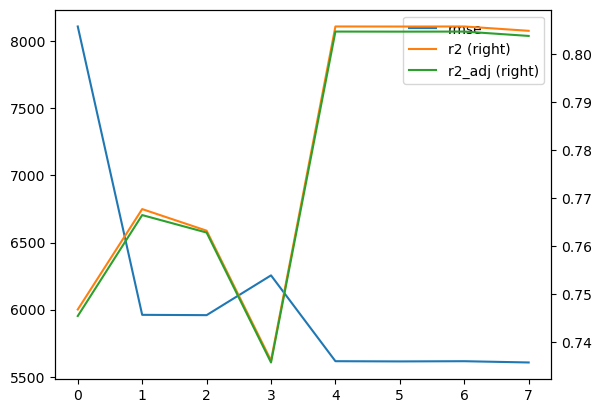

In [157]:
# plot the accuracy measure for all models
# secondary_y: specify the data on the secondary axis
plt.figure(figsize=(15,8))
score_card.plot(secondary_y=['r2','r2_adj'])

# display just the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The graph shows the performance metrics root mean squared error, R-squared and Adjusted R-squared of the models implemented: the X-axis has the model number as given in the table. The plot gives a clear picture of the inverse relation of R squared values and the RMSE value, the better the R-squared value naturally the lesser is the RMSE value.
                    <br><br> Findings suggest that the Elastic Net regression  has the highest accuracy with  lowest RMSE. Finally, it can be concluded that the linear regression with interaction can be used by insurance company to predict claim amount for its customers.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


# END